# Lending Club Case Study

<hr style="border:1px solid blue">

A case study to solve a business problem using Exploratory Data Analysis (EDA).
* Comprehend the given data set and perform EDA to solve the business objective.
* Present the EDA analysis and recommendations to Client to avoid risk in doing business.

### Project Brief Description

Lending Club is a Consumer Finance Company which specialises in lending loans to customers. The company requires to approve and reject loan applications, to minimize the risk of business loss and financial loss.
* **Business loss** happens when a loan is rejected to a applicant, who is likely to repay the loan amount.
* **Financial loss** happens when a loan is approved to a applicant, who is likely not to repay the loan amount.

#### Business Objective
Analyze and Perform Exploratory Data Analysis (EDA) on the given data set, identify the driving factors that indicates why the applicant defaulted.

#### Business Solution
Present a solution using driving factors, which can predict whether a new applicant is likely to default or not. Lending Club will utilize this knowledge for its portfolio and risk assessments.

#### Data Set Brief Information
The data set is from Lending Club, that contains information about past loan applicants and whether they defaulted or not. The data set doesn't contain any transactional history about loan rejection.
The data set contains history of approved loans between years 2007-2011 and it contains loan status of all applications. There are 3 loan statuses available:
* **Fully paid** - Applicant has fully paid the loan.
* **Current** - Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed.
* **Charged-off** - Applicant has not paid the instalments in due time for a long period of time, i.e. applicant has defaulted on the loan.

A data dictionary is provided along with the data set to understand various terms and variables used in loan risk assessment.

### Data Understanding

In [1]:
# Import all required libraries
import numpy as np
import pandas as pd
# Display all columns
pd.set_option("display.max_columns", None)
# Display all floating point values with precision adjusted to two digits
pd.set_option("display.precision", 2)
import matplotlib.pyplot as plt
# To enable the inline plotting
%matplotlib inline
import seaborn as sns
# Ignore warnings due to library versions
import warnings
warnings.filterwarnings("ignore")
# Regular expression for string matching
import re

In [2]:
# Read the dataset
loan_df = pd.read_csv('loan.csv')

In [3]:
# Check the shape of the dataframe
loan_df.shape

(39717, 111)

The given data set have 39717 rows and 111 columns. Let's see first and last 5 values of data set.

In [4]:
# Check the first five rows
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
# Check the last five rows
loan_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.97,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.49,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.16,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.20,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

**Observation**
1) We don't have any columns without name.</br>
2) Data columns are in the format 'Month-Year'.</br>
3) Some columns have text and symbols in it.</br>
4) Null values are present.</br>

Get the concise summary of data set and data type of each column

In [6]:
# Check the dataframe info
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
# Check the datatypes of all the columns of the dataframe
loan_df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

### Data Cleaning

#### Remove NULL values in Columns and Rows in entire index range

Check if there are any rows or columns that have entire content as NULL. We need to drop such columns or rows, since we can't impute any values.

In [8]:
# Check the number of columns having null values across entire index range
loan_df.isnull().all().sum()

54

**Conclusion** : We have 54 columns where entire column values are NULL

Check the columns which will be dropped and quickly analyse the meaning of column from data dictionary.

In [9]:
# Display names of columns having null values across entire index range
loan_df.columns[loan_df.isnull().all()]

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [10]:
# Drop all columns having null values across entire index range
loan_df.dropna(axis = 1, how = 'all', inplace = True)

In [11]:
# Check the number of rows having null values across entire column range
loan_df.isnull().all(axis = 1).sum()

0

**Conclusion** : We have no rows which have entire row contents as NULL

#### Data Duplication Check

As per data dictionary, 'id' and 'member_id' columns have unique values. Check if the data set have any duplicated values in these two columns. If exists, we have to analyse the entire row and remove such rows.

In [12]:
# Check if there is any duplicated 'id' column
loan_df[loan_df.id.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [13]:
# Check if there is any duplicated 'member_id' column
loan_df[loan_df.member_id.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


**Conclusion** : There are no such rows that have duplicated values in 'id' and 'member_id' columns

#### Data Analysis and Filtering

Analyse Data Dictionary to understand the meaning of each column and find if there are NULL values in it. Decide which columns are important for the case study. Drop columns which will not affect the outcome in finding solution for our problem statement.

The analysis will help in imputing values and also drop unecessary columns to make the data set compact.

In [14]:
# Check the shape of the dataframe after dropping columns
loan_df.shape

(39717, 57)

Now we have 39717 rows and 57 columns.

In [15]:
# Check the number of null values in each columns
loan_df.columns[loan_df.isnull().any()]

Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [16]:
# After quick observation of data set, some columns have same values.
# Let's recheck it by printing the count of unique values in each of these columns.
def print_value_counts(list_of_cols):
    for col in list_of_cols:
        print('{}'.format(loan_df[col].value_counts()))

list_of_columns = ['acc_now_delinq', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'delinq_amnt', 'application_type', 'policy_code', 
                   'initial_list_status', 'pymnt_plan', 'tax_liens']

print_value_counts(list_of_columns)

0    39717
Name: acc_now_delinq, dtype: int64
0.0    39661
Name: chargeoff_within_12_mths, dtype: int64
0.0    39661
Name: collections_12_mths_ex_med, dtype: int64
0    39717
Name: delinq_amnt, dtype: int64
INDIVIDUAL    39717
Name: application_type, dtype: int64
1    39717
Name: policy_code, dtype: int64
f    39717
Name: initial_list_status, dtype: int64
n    39717
Name: pymnt_plan, dtype: int64
0.0    39678
Name: tax_liens, dtype: int64


In [17]:
# Display names of all columns in data frame
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

##### Filtering

Delete columns that are not relevant for analysis.
<br>

| Column Name | Reason for deletion |
| :--- | ---: |
| acc_now_delinq | Entire column is zero |
| application_type | Entire column is 'INDIVIDUAL' |
| chargeoff_within_12_mths | Entire column is either 0 or NULL |
| collections_12_mths_ex_med | Entire column is either 0 or NULL |
| delinq_2yrs | Borrowers past history of loan payment delinquency is not required |
| delinq_amnt | Entire column is zero |
| desc | Description can be ignored and we only need the loan purpose |
| emp_title | Rather than employment title, how much annual income borrower earns is more important |
| initial_list_status | Entire column is 'f' |
| inq_last_6mths | Credit inquiries not required |
| member_id | Can be ignored, since we have unique 'id' |
| mths_since_last_delinq | Mostly NULL values, not important data |
| mths_since_last_record | Mostly NULL values, not important data |
| next_pymnt_d | Mostly empty rows, not important data |
| out_prncp | Remaining outstanding principle for loan sanctioned is not needed |
| out_prncp_inv | Remaining outstanding principle for invested amount is not needed |
| policy_code | Entire column is 1 |
| pymnt_plan | Entire column is 'n' |
| tax_liens | Entire column is either 0 or NULL |
| url | Not important data |
| zip_code | Not important data |
| title | Purpose column is enough to categorize Loan Purpose |

In [18]:
# After analysing data dictionary, we can remove columns that doesn't dependent on solution for problem statement
list_of_columns = ["acc_now_delinq", "application_type", "chargeoff_within_12_mths", "collections_12_mths_ex_med", 
                   "delinq_2yrs", "delinq_amnt", "desc", "emp_title", "initial_list_status", "inq_last_6mths", 
                   "member_id", "mths_since_last_delinq", "mths_since_last_record", "next_pymnt_d", "out_prncp", 
                   "out_prncp_inv", "policy_code", "pymnt_plan", "tax_liens", "title", "url", "zip_code"]


loan_df.drop(labels = list_of_columns, axis = 1, inplace = True)

In [19]:
# Check the shape of the dataframe
loan_df.shape

(39717, 35)

Now we have 39717 rows and 35 columns.

In [20]:
# Check the dataframe info
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

### Data Correction and Data Type Conversion

#### Analysis for Data Conversion

term - Column have 'months' in each row that makes its data type as string<br>
int_rate - Column have '%' symbol in each row that makes its data type as string<br>
revol_util - Column have '%' symbol in each row that makes its data type as string<br>

In [21]:
# Apply filter and convert to integer data type
loan_df['term'] = loan_df['term'].str.rstrip('months').astype('int64')
# Apply filter and convert to float data type
loan_df['int_rate'] = loan_df['int_rate'].str.rstrip('%').astype('float64')
loan_df['revol_util'] = loan_df['revol_util'].str.rstrip('%').astype('float64')

#### Analysis for Employment Length

In [22]:
# Get count of Employment Length
loan_df['emp_length'].value_counts(dropna = False)

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
NaN          1075
Name: emp_length, dtype: int64

The column consists of NULL values, string 'year' and symbols '+', '<', which makes its data type as string.<br>
Fill NULL values as '0'experience, since we can't assume borrower's employment length.<br>
Fill '0' for any borrower who have less than 1 experience.<br>
Remove '+' symbol and 'years' using regular expression.<br>
Let's consider all borrowers who have 10 or 10+ experience as 10.

In [23]:
# Fill '0' in NULL case
loan_df['emp_length'].fillna('0', inplace = True)
# Fill '0' in experience less than 1 year case
loan_df[loan_df['emp_length'] == '< 1 year']['emp_length'] = '0'
# Apply filter and convert to integer data type
loan_df['emp_length'] = loan_df['emp_length'].str.extract('(\d+)').astype('int64')

#### Analysis of Loan Status

* Charged Off - Borrowers who are Defaulters (Bad Customer)
* Fully Paid - Borrowers who fully paid their loan back (Good Customer)
* Current - Currently in debt

We can't know that the borrowers in the category 'Current' will either default or pays full amount in future.<br>
Hence we should remove these rows from data set that have 'loan_status' column equal to 'Current'

In [24]:
# Get count of Loan Status
loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [25]:
# Remove all data set that belong to 'Current' category in loan status column
loan_df = loan_df[loan_df['loan_status'] != 'Current']

### Deriving new columns

#### Derive Month and Year from Date columns

In [26]:
# Split date columns to year and month respectively
list_of_columns = ["issue_d", "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d"]

for col in list_of_columns:
    loan_df[col] = pd.to_datetime(loan_df[col], format = '%b-%y') # Convert to datetime format
    month = col + '_month' # Append '_month' to column name
    year = col + '_year' # Append '_year' to column name
    loan_df[month] = loan_df[col].dt.month_name().str[:3] # Extract month
    loan_df[year] = loan_df[col].dt.year # Extract year
    loan_df.drop(labels = col, axis = 1, inplace = True) # Delete respective date column

#### Categorize column values to buckets (bins)

In [27]:
# Description of the 'int_rate' column
loan_df['int_rate'].describe()

count    38577.00
mean        11.93
std          3.69
min          5.42
25%          8.94
50%         11.71
75%         14.38
max         24.40
Name: int_rate, dtype: float64

In [28]:
# 'int_rate' column can be divided 4 buckets
loan_df['int_rate_bucket'] = pd.cut(loan_df['int_rate'], 
                                    np.arange(5, 26, 5), # bins : min is greater than 5 and max is less than 25
                                    labels = ['5-10', '10-15', '15-20', '20-25']) # bucket labels

In [29]:
# Description of the 'dti' column
loan_df['dti'].describe()

count    38577.00
mean        13.27
std          6.67
min          0.00
25%          8.13
50%         13.37
75%         18.56
max         29.99
Name: dti, dtype: float64

In [30]:
# 'dti_bucket' column can be divided 6 buckets
loan_df['dti_bucket'] = pd.cut(loan_df['dti'], 
                               np.arange(0, 31, 5), # bins : min is equal to 0 and max is less than 30
                               labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30']) # bucket labels

In [31]:
# Description of the 'loan_amnt' column
loan_df['loan_amnt'].describe()

count    38577.00
mean     11047.03
std       7348.44
min        500.00
25%       5300.00
50%       9600.00
75%      15000.00
max      35000.00
Name: loan_amnt, dtype: float64

In [32]:
# 'loan_amnt' column can be divided 7 buckets
loan_df['loan_amnt_bucket'] = pd.cut(loan_df['loan_amnt'], 
                                     np.arange(0, 35001, 5000), # bins : min is equal to 500 and max is equal to 35000
                                     labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35']) # bucket labels

In [33]:
# Description of the 'annual_inc' column
loan_df['annual_inc'].describe()

count    3.86e+04
mean     6.88e+04
std      6.42e+04
min      4.00e+03
25%      4.00e+04
50%      5.89e+04
75%      8.20e+04
max      6.00e+06
Name: annual_inc, dtype: float64

In [34]:
# 'annual_inc' column can be divided 7 buckets
loan_df['annual_inc_bucket'] = pd.cut(loan_df['annual_inc'], 
                                      [0, 10000, 20000, 50000, 100000, 1000000, 5000000, 6000000],  # bins : min is equal to 4000 and max is equal to 6000000
                                      labels=['0-10', '10-20', '20-50', '50-100', '100-1000', '1000-5000', '5000+']) # bucket labels

#### Derive new column

Our target is to predict which customers will Default. So let's create a target variable out of Loan Status column.<br>
Assign customers who are 'Charged Off' (Defaulters) as 100 (Value 100 helps in calculating percentage easily)
Assign customers who are 'Fully Paid' (Non-Defaulters) as 0

In [35]:
# Create new column 'defaulters'
loan_df['defaulters'] = loan_df['loan_status'].apply(lambda x: 100 if x == 'Charged Off' else 0)

### Standardise Data Types

In [36]:
# Convert variables to float data type
list_of_columns = ["loan_amnt", "funded_amnt", "revol_bal"]

loan_df[list_of_columns] = loan_df[list_of_columns].astype('float64')

In [37]:
# Convert variables to category data type
list_of_columns = ["grade", "sub_grade", "home_ownership", "verification_status", "purpose", "addr_state"]

loan_df[list_of_columns] = loan_df[list_of_columns].astype('category')

### Data Imputation

In [39]:
# Check percentage of missing data
percent_missing = (loan_df.isnull().sum() * 100 / len(loan_df)).sort_values(ascending = False)
percent_missing[percent_missing > 0]

pub_rec_bankruptcies        1.81e+00
dti_bucket                  4.61e-01
last_pymnt_d_year           1.84e-01
last_pymnt_d_month          1.84e-01
revol_util                  1.30e-01
last_credit_pull_d_year     5.18e-03
last_credit_pull_d_month    5.18e-03
dtype: float64

In [40]:
# Fill NULL values in column 'pub_rec_bankruptcies' as 'Status Unknown'
loan_df['pub_rec_bankruptcies'].fillna('Status Unknown', inplace = True)

**Conclusion**<br>
Missing percentage of Data is very less.<br>
We can't impute date and revolving line utilization rate.<br>
Hence we can currently ignore this as it doesn't affect much on our solution for problem statement.

In [38]:
# Check the shape of the dataframe
loan_df.shape

(38577, 44)

Now we have 38577 rows and 44 columns.

In [187]:
# Check the first five rows
loan_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,int_rate_bucket,dti_bucket,loan_amnt_bucket,annual_inc_bucket,defaulters
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,3,0,13648.0,83.7,9,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0,Dec,2011,Jan,1985,Jan,2015.0,May,2016.0,10-15,25-30,0-5,20-50,0
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,3,0,1687.0,9.4,4,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,Dec,2011,Apr,1999,Apr,2013.0,Sep,2013.0,15-20,0-5,0-5,20-50,100
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,2,0,2956.0,98.5,10,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0,Dec,2011,Nov,2001,Jun,2014.0,May,2016.0,15-20,5-10,0-5,10-20,0
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,10,0,5598.0,21.0,37,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0,Dec,2011,Feb,1996,Jan,2015.0,Apr,2016.0,10-15,15-20,5-10,20-50,0
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,9,0,7963.0,28.3,12,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,0.0,Dec,2011,Nov,2004,Jan,2015.0,Jan,2016.0,5-10,10-15,0-5,20-50,0


### Univariate Analysis

Analysing variables one at a time.

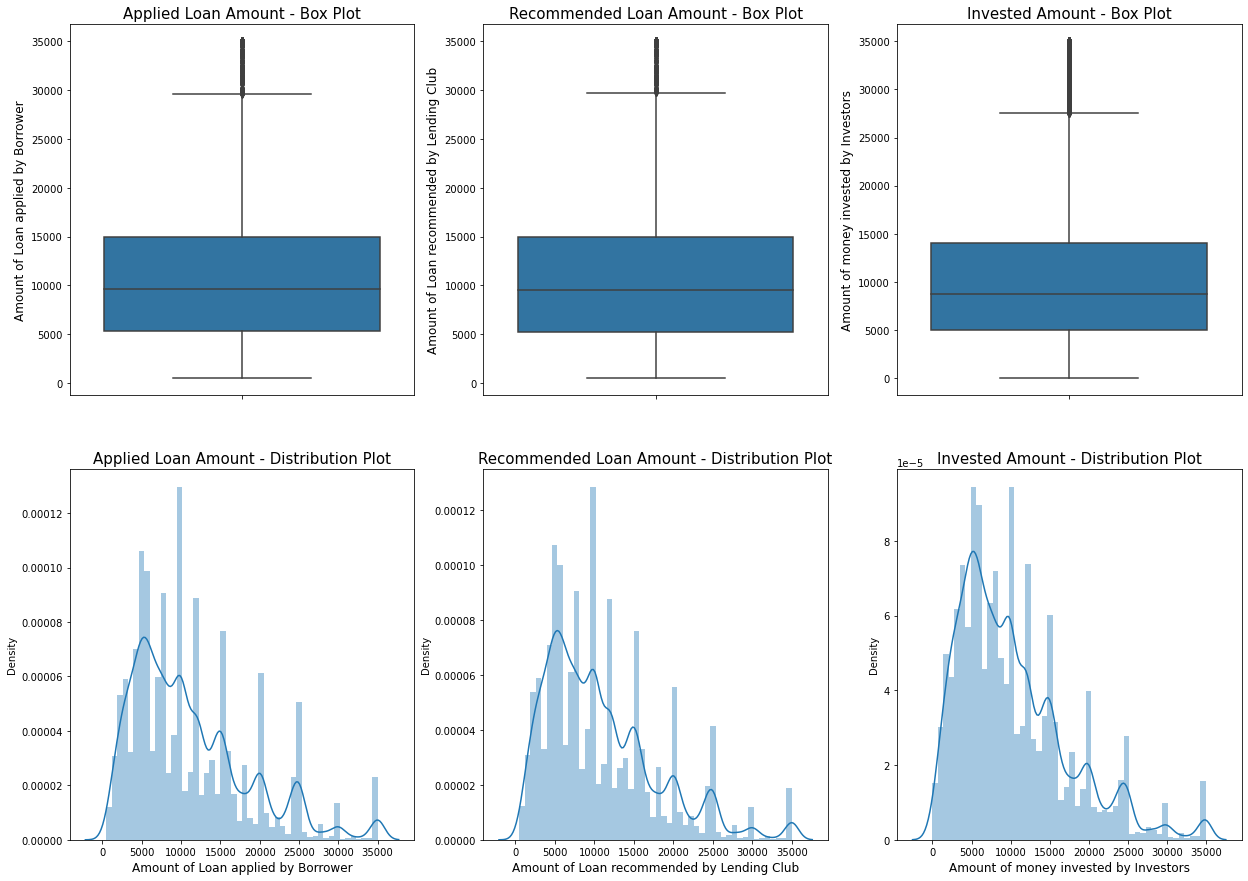

In [41]:
# Analysis of Columns loan_amnt, funded_amnt, funded_amnt_inv

# Subplot - 2 rows and 3 columns
fig, axes = plt.subplots(2, 3)

# Box Plot of column loan_amnt
sns.boxplot(y = loan_df['loan_amnt'], ax = axes[0][0])
axes[0][0].set_ylabel('Amount of Loan applied by Borrower', fontsize = 12)
axes[0][0].set_title('Applied Loan Amount - Box Plot', fontsize = 15)

# Box Plot of column funded_amnt
sns.boxplot(y = loan_df['funded_amnt'], ax = axes[0][1])
axes[0][1].set_ylabel('Amount of Loan recommended by Lending Club', fontsize = 12)
axes[0][1].set_title('Recommended Loan Amount - Box Plot', fontsize = 15)

# Box Plot of column funded_amnt_inv
sns.boxplot(y = loan_df['funded_amnt_inv'], ax = axes[0][2])
axes[0][2].set_ylabel('Amount of money invested by Investors', fontsize = 12)
axes[0][2].set_title('Invested Amount - Box Plot', fontsize = 15)

# Distribution Plot of column loan_amnt
sns.distplot(loan_df['loan_amnt'], ax = axes[1][0])
axes[1][0].set_xlabel('Amount of Loan applied by Borrower', fontsize = 12)
axes[1][0].set_title('Applied Loan Amount - Distribution Plot', fontsize = 15)

# Distribution Plot of column funded_amnt
sns.distplot(loan_df['funded_amnt'], ax = axes[1][1])
axes[1][1].set_xlabel('Amount of Loan recommended by Lending Club', fontsize = 12)
axes[1][1].set_title('Recommended Loan Amount - Distribution Plot', fontsize = 15)

# Distribution Plot of column funded_amnt_inv
sns.distplot(loan_df['funded_amnt_inv'], ax = axes[1][2])
axes[1][2].set_xlabel('Amount of money invested by Investors', fontsize = 12)
axes[1][2].set_title('Invested Amount - Distribution Plot', fontsize = 15)

fig.set_size_inches(21, 15, forward = True)
plt.show()

**Conclusion**

* Distribution plot of all 3 columns looks similar.
* By observing 25th and 75th percentile, most of the loan amount applied is in the range 5000 to 15000

Analysis of min, max and median of all 3 columns

In [42]:
loan_df['loan_amnt'].describe()

count    38577.00
mean     11047.03
std       7348.44
min        500.00
25%       5300.00
50%       9600.00
75%      15000.00
max      35000.00
Name: loan_amnt, dtype: float64

In [43]:
loan_df['funded_amnt'].describe()

count    38577.00
mean     10784.06
std       7090.31
min        500.00
25%       5200.00
50%       9550.00
75%      15000.00
max      35000.00
Name: funded_amnt, dtype: float64

In [44]:
loan_df['funded_amnt_inv'].describe()

count    38577.00
mean     10222.48
std       7022.72
min          0.00
25%       5000.00
50%       8733.44
75%      14000.00
max      35000.00
Name: funded_amnt_inv, dtype: float64

**Conclusion**

* Amount of Loan applied by Borrower varies from 500 to 35000, having a median of 10000
* Amount of Loan recommended by Lending Club varies from 500 to 35000, having a median of 9600
* Amount of Money invested by Investor varies from 0 to 35000, having a median of 8733.44

This implies that the borrower doesn't always get the exact applied loan or loan amount.

In [45]:
# Analysis of Column annual_inc

# Description of the 'annual_inc' column
loan_df['annual_inc'].describe()

count    3.86e+04
mean     6.88e+04
std      6.42e+04
min      4.00e+03
25%      4.00e+04
50%      5.89e+04
75%      8.20e+04
max      6.00e+06
Name: annual_inc, dtype: float64

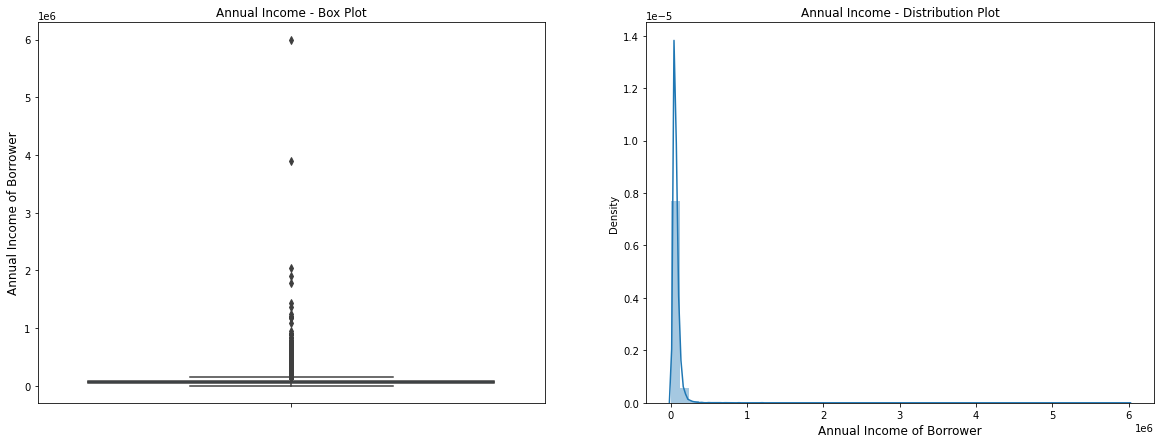

In [46]:
# Plot boxplot and distribution plot of 'annual_inc' column in subplot
# Subplot - 1 rows and 2 columns
fig, axes = plt.subplots(1, 2)

# Box Plot of column annual_inc
sns.boxplot(y = loan_df['annual_inc'], ax = axes[0])
axes[0].set_ylabel('Annual Income of Borrower', fontsize = 12)
axes[0].set_title('Annual Income - Box Plot')

# Distribution Plot of column annual_inc
sns.distplot(loan_df['annual_inc'], ax = axes[1])
axes[1].set_xlabel('Annual Income of Borrower', fontsize = 12)
axes[1].set_title('Annual Income - Distribution Plot')

fig.set_size_inches(20, 7, forward = True)
plt.show()

In [47]:
# So there are lot of outliers present in annual income data, that affects the plot.
# Let's check if we can remove outliers.
# Most of the big outliers lies after 99th percentile. Let's see how much entries are there.
loan_df[loan_df['annual_inc'] > loan_df['annual_inc'].quantile(0.99)].shape

(386, 44)

In [48]:
# So we have 386 such entries.
# Check shape of dataframe when annual_inc is greater than 99th percentile and charged-off
loan_df[(loan_df['annual_inc'] > loan_df['annual_inc'].quantile(0.99)) & (loan_df['defaulters'] == 100)].shape

(43, 44)

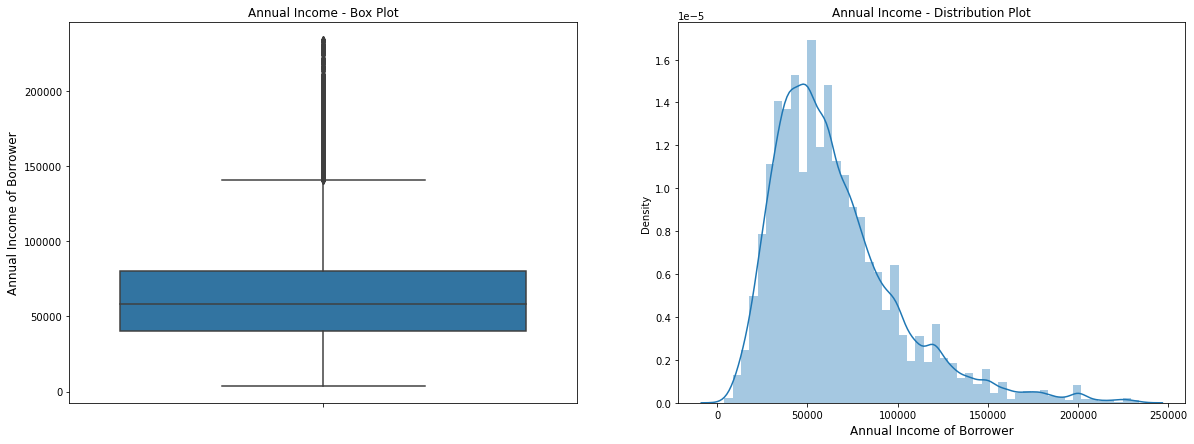

In [49]:
# For the purpose of analysis and plotting, we can remove some outliers (high annual income).
# We can't actually remove these outliers as there is a chance of that applicant can also default!
# From above shape, we can see that there are 43 such applicants.

# Remove all rows with annual_inc greater than 99th percentile and create temporary dataframe
new_loan_df = loan_df[loan_df['annual_inc'] < loan_df['annual_inc'].quantile(0.99)]

# Subplot - 1 rows and 2 columns
fig, axes = plt.subplots(1, 2)

# Box Plot of column annual_inc
sns.boxplot(y = new_loan_df['annual_inc'], ax = axes[0])
axes[0].set_ylabel('Annual Income of Borrower', fontsize = 12)
axes[0].set_title('Annual Income - Box Plot')

# Distribution Plot of column annual_inc
sns.distplot(new_loan_df['annual_inc'], ax = axes[1])
axes[1].set_xlabel('Annual Income of Borrower', fontsize = 12)
axes[1].set_title('Annual Income - Distribution Plot')

fig.set_size_inches(20, 7, forward = True)
plt.show()

**Conclusion**

* Majority of the Annual Income of Borrower lies in the range 40000 to 80000
* Since this study is for identifying a defaulter, we have to consider all borrowers with low and high annual incomes. So, removing outlier might affect our analysis.

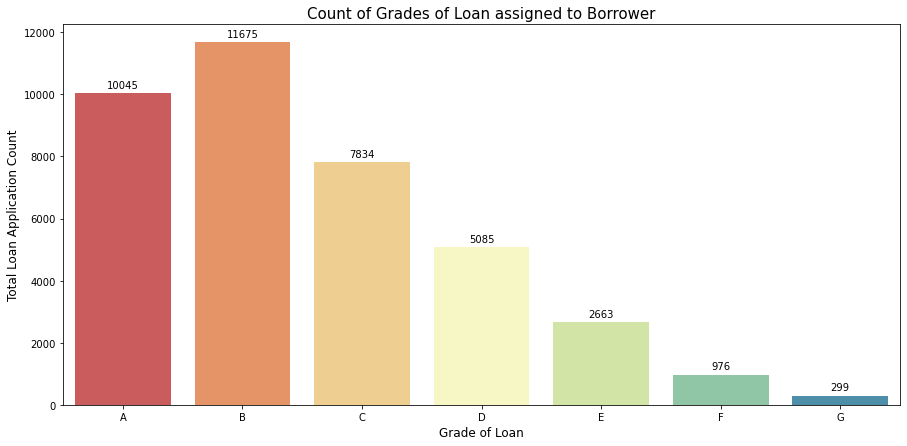

In [50]:
# Plot number of loans in the category grade
plt.figure(figsize = (15, 7))
ax = sns.countplot(x = 'grade', data = loan_df, palette = 'Spectral')
plt.xlabel('Grade of Loan', fontsize = 12)
plt.ylabel('Total Loan Application Count', fontsize = 12)
plt.title('Count of Grades of Loan assigned to Borrower', fontsize = 15)
ax.bar_label(ax.containers[0], fmt = '%d', padding = 3)
plt.show()

**Conclusion**

* Loans are classified in to 7 grades, namely - A to G.
* We can infer that the most popular grades are B and A. And the least popular grades are F and G.

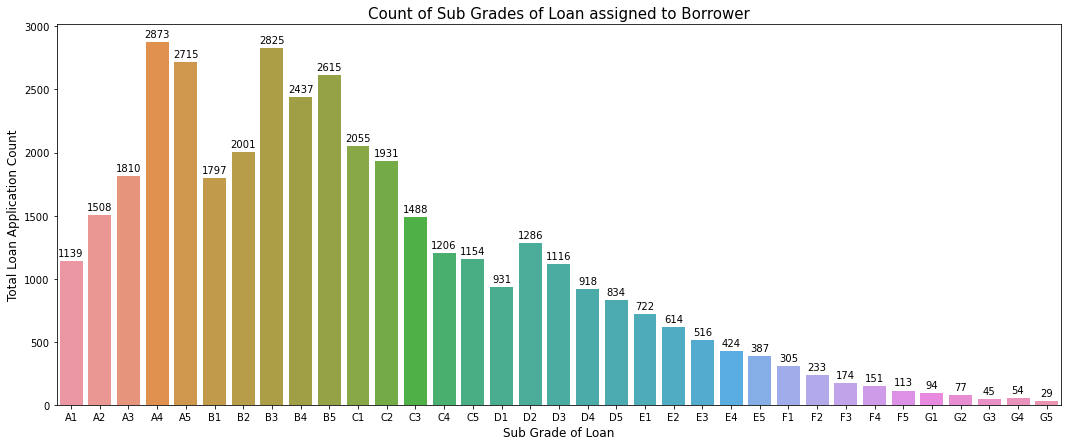

In [51]:
# Plot number of loans in the category sub_grade - 1 to 5
plt.figure(figsize = (18, 7))
ax = sns.countplot(x = 'sub_grade', data = loan_df)
plt.xlabel('Sub Grade of Loan', fontsize = 12)
plt.ylabel('Total Loan Application Count', fontsize = 12)
plt.title('Count of Sub Grades of Loan assigned to Borrower', fontsize = 15)
ax.bar_label(ax.containers[0], fmt = '%d', padding = 3)
plt.show()

**Conclusion**

* Loans are further classified in to 5 sub grades, namely - 1 to 5.
* We can infer that the most popular grades are A4 and B3. And the least popular grades are G3 and G5.

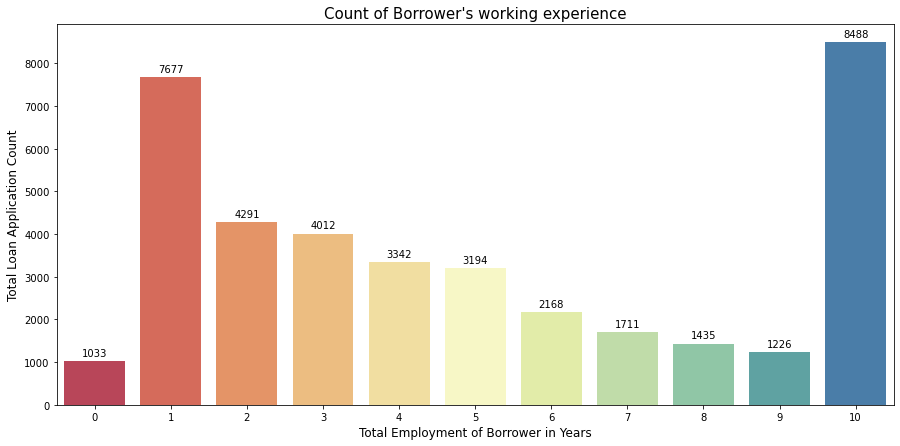

In [52]:
# Plot number of loans in the category employment length
plt.figure(figsize = (15, 7))
ax = sns.countplot(loan_df['emp_length'], palette = 'Spectral')
plt.xlabel('Total Employment of Borrower in Years', fontsize = 12)
plt.ylabel('Total Loan Application Count', fontsize = 12)
plt.title('Count of Borrower\'s working experience', fontsize = 15)
ax.bar_label(ax.containers[0], fmt = '%d', padding = 3)
plt.show()

**Conclusion**

Majority of the Loans applied by Borrowers have 1 and 10 or 10+ years of experience

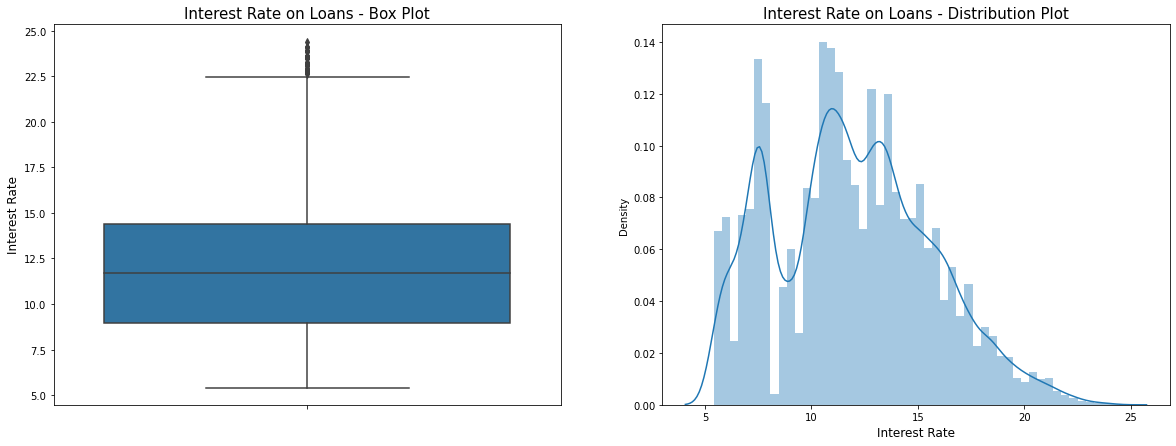

In [53]:
# Analysis of Column int_rate

# Subplot - 1 rows and 2 columns
fig, axes = plt.subplots(1, 2)

# Box Plot of column annual_inc
sns.boxplot(y = loan_df['int_rate'], ax = axes[0])
axes[0].set_ylabel('Interest Rate', fontsize = 12)
axes[0].set_title('Interest Rate on Loans - Box Plot', fontsize = 15)

# Distribution Plot of column annual_inc
sns.distplot(loan_df['int_rate'], ax = axes[1])
axes[1].set_xlabel('Interest Rate', fontsize = 12)
axes[1].set_title('Interest Rate on Loans - Distribution Plot', fontsize = 15)

fig.set_size_inches(20, 7, forward = True)
plt.show()

**Conclusion**

Majority of the Interest Rate on Loans is in the range 8 to 15

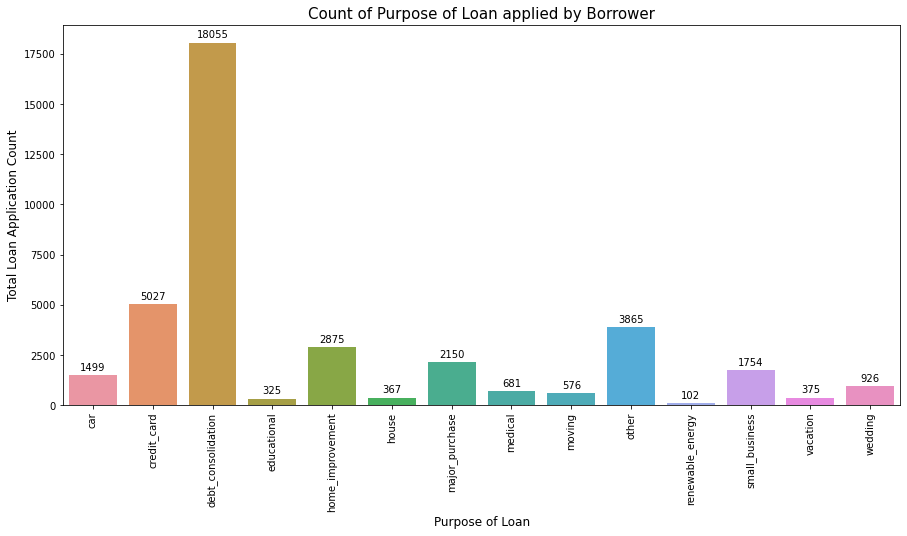

In [54]:
# Plot number of loans in the category purpose
plt.figure(figsize = (15, 7))
ax = sns.countplot(x = 'purpose', data = loan_df)
plt.xlabel('Purpose of Loan', fontsize = 12)
plt.ylabel('Total Loan Application Count', fontsize = 12)
plt.title('Count of Purpose of Loan applied by Borrower', fontsize = 15)
plt.xticks(rotation = 'vertical')
ax.bar_label(ax.containers[0], fmt = '%d', padding = 3)
plt.show()

**Conclusion**

Majority of the loan applied by borrowers are for debt consolidation and credit card payment purpose.

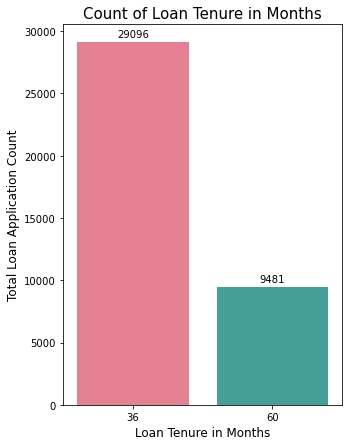

In [55]:
# Plot number of loans in the category term
plt.figure(figsize = (5, 7))
ax = sns.countplot(x = 'term', data = loan_df, palette = "husl")
plt.xlabel('Loan Tenure in Months', fontsize = 12)
plt.ylabel('Total Loan Application Count', fontsize = 12)
plt.title('Count of Loan Tenure in Months', fontsize = 15)
ax.bar_label(ax.containers[0], fmt = '%d', padding = 3)
plt.show()

**Conclusion**

Majority of the loan applied by borrowers is for total loan tenure of 36 months

In [56]:
# Function to display percentage
def display_percentage(col, axis):
    percentage = loan_df[col].value_counts() * 100 / len(loan_df)
    patches = axis.patches
    for i in range(len(patches)):
       x = patches[i].get_x() + patches[i].get_width()/2
       y = patches[i].get_height() + 500
       axis.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha = 'center')

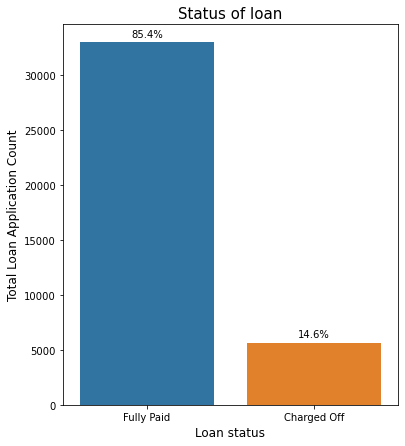

In [57]:
# Plot number of loans in the category loan_status
plt.figure(figsize = (6, 7))
ax = sns.countplot(loan_df['loan_status'])
plt.xlabel('Loan status', fontsize = 12)
plt.ylabel('Total Loan Application Count', fontsize = 12)
plt.title('Status of loan', fontsize = 15)
display_percentage('loan_status', ax)
plt.show()

**Conclusion**
* Majority of the Loans are fully paid by Borrowers.
* 14.6% of borrowers are charged off.

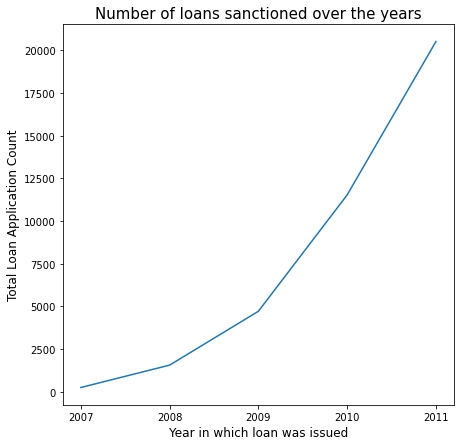

In [58]:
# Plot number of loans sanctioned over the years
plt.figure(figsize = (7, 7))
loans_issued = loan_df.groupby('issue_d_year')['id'].count()
loans_issued.plot.line()
plt.xticks(np.arange(min(loans_issued.index), max(loans_issued.index) + 1, 1.0))
plt.title('Number of loans sanctioned over the years', fontsize = 15)
plt.xlabel('Year in which loan was issued', fontsize = 12)
plt.ylabel('Total Loan Application Count', fontsize = 12)
plt.show()

### Segmented Univariate Analysis

Extract useful insights by conducting univariate analysis on segments of data.<br>
In this analysis, we will consider 'defaulters' column to segment the variables.<br>
In general, we will plot the variable vs Default Rate (Percentage of defaulters) plot.

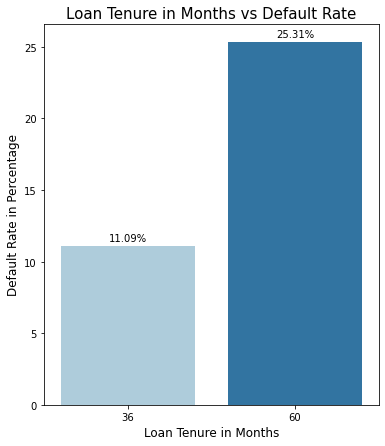

In [59]:
# Plot number of loans defaulted for the column term
plt.figure(figsize = (6, 7))
ax = sns.barplot(x = 'term', y = 'defaulters', data = loan_df, ci = None, palette = "Paired")
plt.xlabel('Loan Tenure in Months', fontsize = 12)
plt.ylabel('Default Rate in Percentage', fontsize = 12)
plt.title('Loan Tenure in Months vs Default Rate', fontsize = 15)
ax.bar_label(ax.containers[0], fmt = '%.2f%%', padding = 3)
plt.show()

**Conclusion**

Majority of the Loans are defaulted by Borrowers when loan tenure is 60 months.

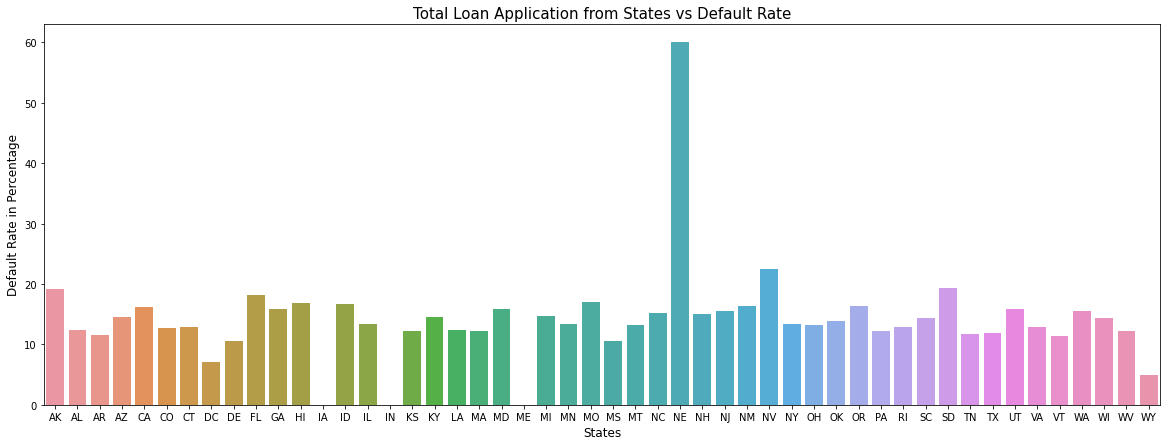

In [60]:
# Plot number of loans defaulted for the column addr_state
plt.figure(figsize = (20, 7))
ax = sns.barplot(x = 'addr_state', y = 'defaulters', data = loan_df, ci = None)
plt.xlabel('States', fontsize = 12)
plt.ylabel('Default Rate in Percentage', fontsize = 12)
plt.title('Total Loan Application from States vs Default Rate', fontsize = 15)
plt.show()

In [205]:
# We can see applicants belonging to state NE have higher chance (60%) to default.
# Let's analyse the data, why state NE have this high value.
# Break down the above plot to pivot table and see how default rate of each State was calculated
# Get unique count for loan status with index as State

# Create a function to calculate default rate percentage and display the sorted table.
def def_rate_calc(idx):
    # Create pivot table index = idx and columns = loan status
    temp_df = loan_df.pivot_table(index = idx, columns = 'loan_status', aggfunc = lambda x: len(x.unique()), fill_value = 0)['id']
    temp_df['Total'] = temp_df['Charged Off'] + temp_df['Fully Paid'] # Sum to find total count
    temp_df['Default Rate in Percentage'] = (temp_df['Charged Off'] / temp_df['Total'])* 100 # Find default rate percentage
    temp_df.sort_values('Default Rate in Percentage', ascending = False, inplace = True) # Sort based on default rate
    return temp_df.style

def_rate_calc('addr_state')

loan_status,Charged Off,Fully Paid,Total,Default Rate in Percentage
addr_state,,,,
NE,3,2,5,60.000000
NV,108,371,479,22.546973
SD,12,50,62,19.354839
AK,15,63,78,19.230769
FL,504,2277,2781,18.122977
MO,114,556,670,17.014925
HI,28,138,166,16.867470
ID,1,5,6,16.666667
NM,30,153,183,16.393443


Total loan application count from NE is very less. Even though the default rate is high, we can't conclude because of less loan application count.

**Conclusion**

States NV and CA have good number of loan application and default rate is also high.

This implies that 'addr_state' variable is not a good predictor of defaulting, if total loan application count is less!

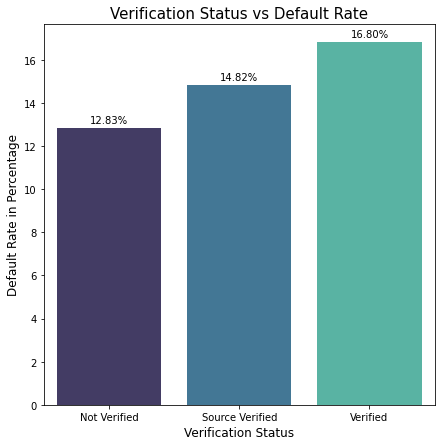

In [62]:
# Plot number of loans defaulted for the column verification_status
plt.figure(figsize = (7, 7))
ax = sns.barplot(x = 'verification_status', y = 'defaulters', data = loan_df, ci = None, palette = "mako")
plt.xlabel('Verification Status', fontsize = 12)
plt.ylabel('Default Rate in Percentage', fontsize = 12)
plt.title('Verification Status vs Default Rate', fontsize = 15)
ax.bar_label(ax.containers[0], fmt = '%.2f%%', padding = 3)
plt.show()

In [224]:
# Display pivot table of default rate for 'verification_status'
def_rate_calc('verification_status')

loan_status,Charged Off,Fully Paid,Total,Default Rate in Percentage
verification_status,,,,
Verified,2051,10155,12206,16.803212
Source Verified,1434,8243,9677,14.818642
Not Verified,2142,14552,16694,12.830957


**Conclusion**

Majority of the Loans are defaulted by Borrowers whose source of income was verified. So even if Lending Club verified the income, it doesn't imply that they have less chance to default.

This variable might not be a good predictor as we expect 'not verified' category or at least 'source verified' (verified by 3rd party) category to default more.

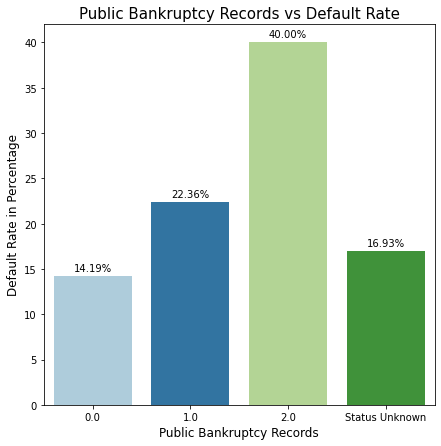

In [63]:
# Plot number of loans defaulted for the column pub_rec_bankruptcies
plt.figure(figsize = (7, 7))
ax = sns.barplot(x = 'pub_rec_bankruptcies', y = 'defaulters', data = loan_df, ci = None, palette = "Paired")
plt.xlabel('Public Bankruptcy Records', fontsize = 12)
plt.ylabel('Default Rate in Percentage', fontsize = 12)
plt.title('Public Bankruptcy Records vs Default Rate', fontsize = 15)
ax.bar_label(ax.containers[0], fmt = '%.2f%%', padding = 3)
plt.show()

In [223]:
# Display pivot table of default rate for 'pub_rec_bankruptcies'
def_rate_calc('pub_rec_bankruptcies')

loan_status,Charged Off,Fully Paid,Total,Default Rate in Percentage
pub_rec_bankruptcies,,,,
2.000000,2,3,5,40.000000
1.000000,366,1271,1637,22.357972
Status Unknown,118,579,697,16.929699
0.000000,5141,31097,36238,14.186765


**Conclusion**

* Some applicant's Public Bankruptcy Record status is unknown.
* Applicant's with one Public Bankruptcy Record have defaulted more than applicants who have no records
* Majority of the Loans are defaulted by Borrowers with two Public Bankruptcy Records

This implies that applicant's who have already defaulted before, will default in future as well.

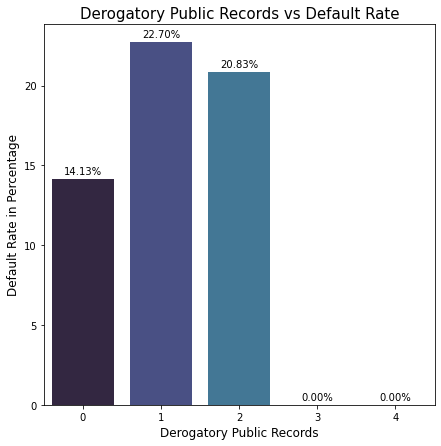

In [64]:
# Plot number of loans defaulted for the column pub_rec_bankruptcies
plt.figure(figsize = (7, 7))
ax = sns.barplot(x = 'pub_rec', y = 'defaulters', data = loan_df, ci = None, palette = "mako")
plt.xlabel('Derogatory Public Records', fontsize = 12)
plt.ylabel('Default Rate in Percentage', fontsize = 12)
plt.title('Derogatory Public Records vs Default Rate', fontsize = 15)
ax.bar_label(ax.containers[0], fmt = '%.2f%%', padding = 3)
plt.show()

**Conclusion**

* Majority of the Loans are defaulted by Borrowers who have Derogatory Public Record 1 and 2.
* Very Less number loans are defaulted by Borrowers who have Derogatory Public Record 3 and 4.

This variable might not be a good predictor as we can't say anything about applicants with Derogatory Public Record - 3 and 4

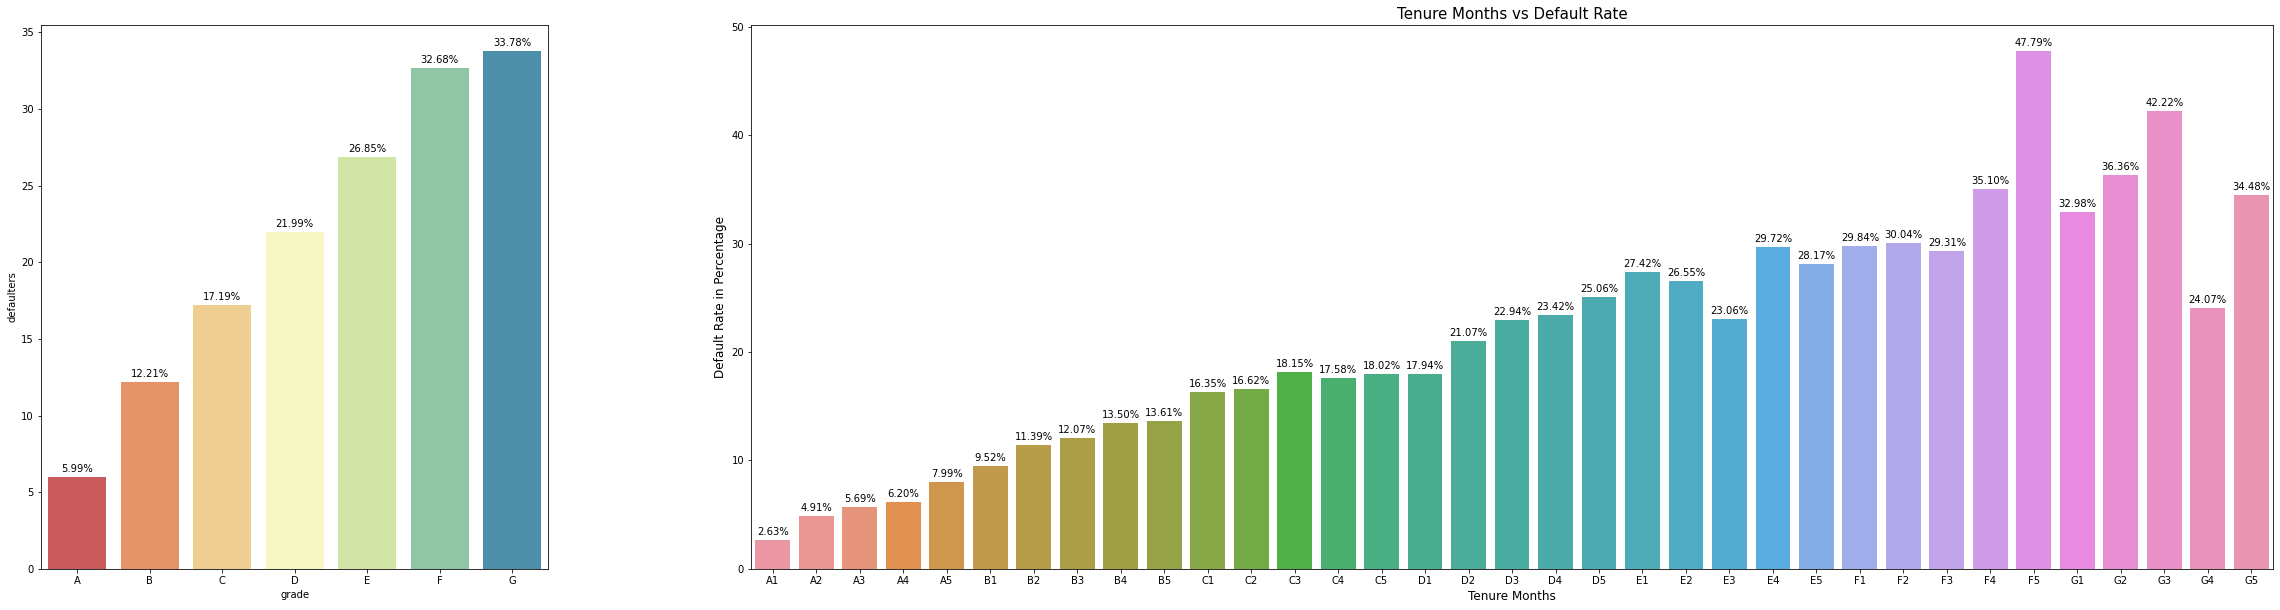

In [65]:
# Plot number of loans defaulted for the categories grade and sub_grade

# Subplot - 1 rows and 2 columns
fig, axes = plt.subplots(ncols = 2, gridspec_kw = {'width_ratios': [10, 30], 'height_ratios' : [1]}, figsize = (40, 10))
sns.barplot(x = 'grade', y = 'defaulters', data = loan_df, ci = None, ax = axes[0], palette = 'Spectral')
plt.xlabel('Tenure Months', fontsize = 12)
plt.ylabel('Default Rate in Percentage', fontsize = 12)
plt.title('Tenure Months vs Default Rate', fontsize = 15)
axes[0].bar_label(axes[0].containers[0], fmt = '%.2f%%', padding = 3)

sns.barplot(x = 'sub_grade', y = 'defaulters', data = loan_df, ci = None, ax = axes[1])
plt.xlabel('Tenure Months', fontsize = 12)
plt.ylabel('Default Rate in Percentage', fontsize = 12)
plt.title('Tenure Months vs Default Rate', fontsize = 15)
axes[1].bar_label(axes[1].containers[0], fmt = '%.2f%%', padding = 3)
plt.show()

**Conclusion**

* Majority of the Loans are defaulted by Borrowers when grade is G and F. Default rate increases from grades A to G.
* Majority of the Loans are defaulted by Borrowers when sub grade is F5. Default rate increases from sub grades of A to sub grades of G.

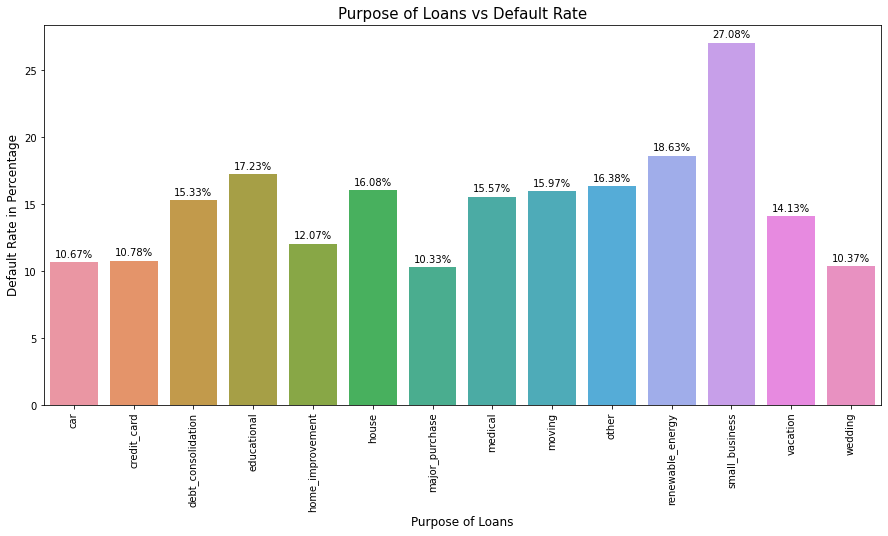

In [66]:
# Plot number of loans defaulted for the column purpose
plt.figure(figsize = (15, 7))
ax = sns.barplot(x = 'purpose', y = 'defaulters', data = loan_df, ci = None)
plt.xlabel('Purpose of Loans', fontsize = 12)
plt.ylabel('Default Rate in Percentage', fontsize = 12)
plt.title('Purpose of Loans vs Default Rate', fontsize = 15)
plt.xticks(rotation = 'vertical')
ax.bar_label(ax.containers[0], fmt = '%.2f%%', padding = 3)
plt.show()

**Conclusion**<br>
Majority of the Loans are defaulted by Borrowers are ones who applied loan for 'small business'

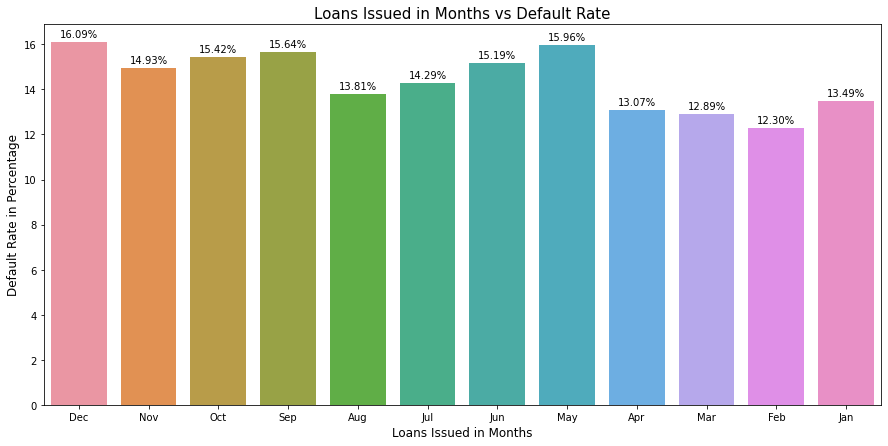

In [67]:
# Plot number of loans defaulted for the month in which loans was issued
plt.figure(figsize = (15, 7))
ax = sns.barplot(x = 'issue_d_month', y = 'defaulters', data = loan_df, ci = None)
plt.xlabel('Loans Issued in Months', fontsize = 12)
plt.ylabel('Default Rate in Percentage', fontsize = 12)
plt.title('Loans Issued in Months vs Default Rate', fontsize = 15)
ax.bar_label(ax.containers[0], fmt = '%.2f%%', padding = 3)
plt.show()

**Conclusion**

Majority of the Loans are defaulted by Borrowers when loan issued date is in holdidays - winter (December) and Spring-Summer break (May-June)

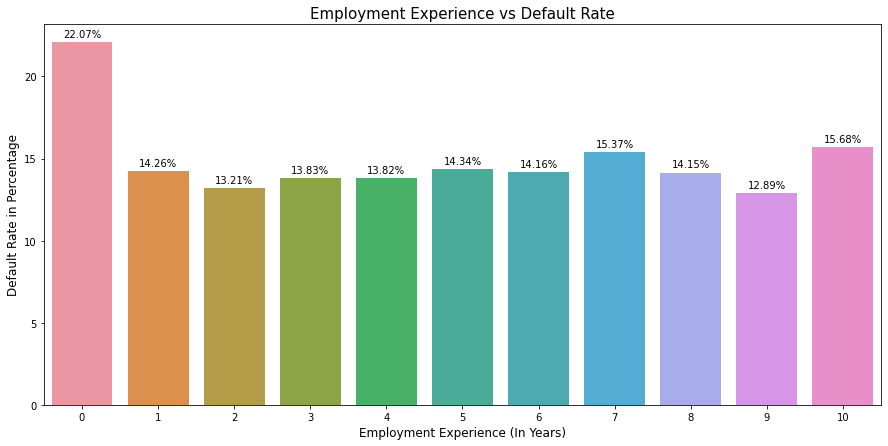

In [68]:
# Plot number of loans defaulted for applicant's employment experience
plt.figure(figsize = (15, 7))
ax = sns.barplot(x = 'emp_length', y = 'defaulters', data = loan_df, ci = None)
plt.xlabel('Employment Experience (In Years)', fontsize = 12)
plt.ylabel('Default Rate in Percentage', fontsize = 12)
plt.title('Employment Experience vs Default Rate', fontsize = 15)
ax.bar_label(ax.containers[0], fmt = '%.2f%%', padding = 3)
plt.show()

**Conclusion**

* Majority of the Loans are defaulted by Borrowers are those who have no job or have less than 1 year of experience. This can be due to lack of proper annual income.
* Rest of the applicants have equivalent chances of defaulting.

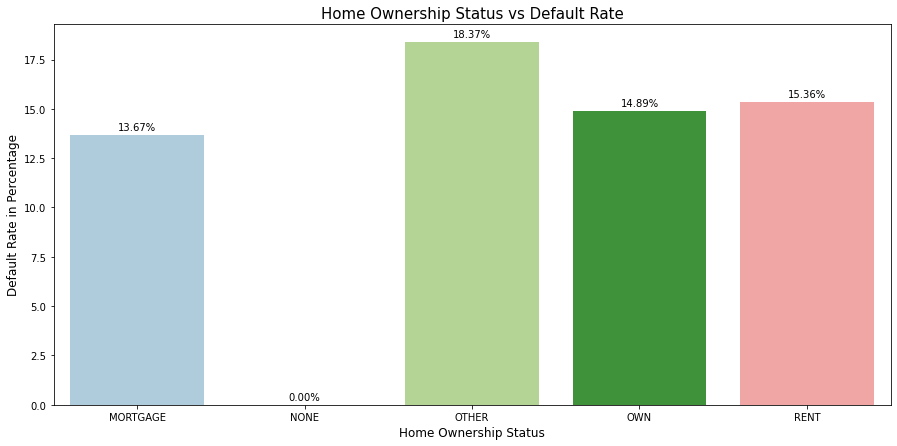

In [69]:
# Plot number of loans defaulted for applicant's employment experience
plt.figure(figsize = (15, 7))
ax = sns.barplot(x = 'home_ownership', y = 'defaulters', data = loan_df, ci = None, palette = "Paired")
plt.xlabel('Home Ownership Status', fontsize = 12)
plt.ylabel('Default Rate in Percentage', fontsize = 12)
plt.title('Home Ownership Status vs Default Rate', fontsize = 15)
ax.bar_label(ax.containers[0], fmt = '%.2f%%', padding = 3)
plt.show()

In [206]:
# Display pivot table of default rate for 'home_ownership'
def_rate_calc('home_ownership')

loan_status,Charged Off,Fully Paid,Total,Default Rate in Percentage
home_ownership,,,,
OTHER,18,80,98,18.367347
RENT,2839,15641,18480,15.362554
OWN,443,2532,2975,14.890756
MORTGAGE,2327,14694,17021,13.671347
NONE,0,3,3,0.000000


**Conclusion**

* Majority of the Loans are defaulted by Borrowers having home ownership status as 'RENT' and 'MORTGAGE'
* Eventhough 'OTHER' category percentage is high, count of loan application is less compared to 'RENT' and 'MORTGAGE'

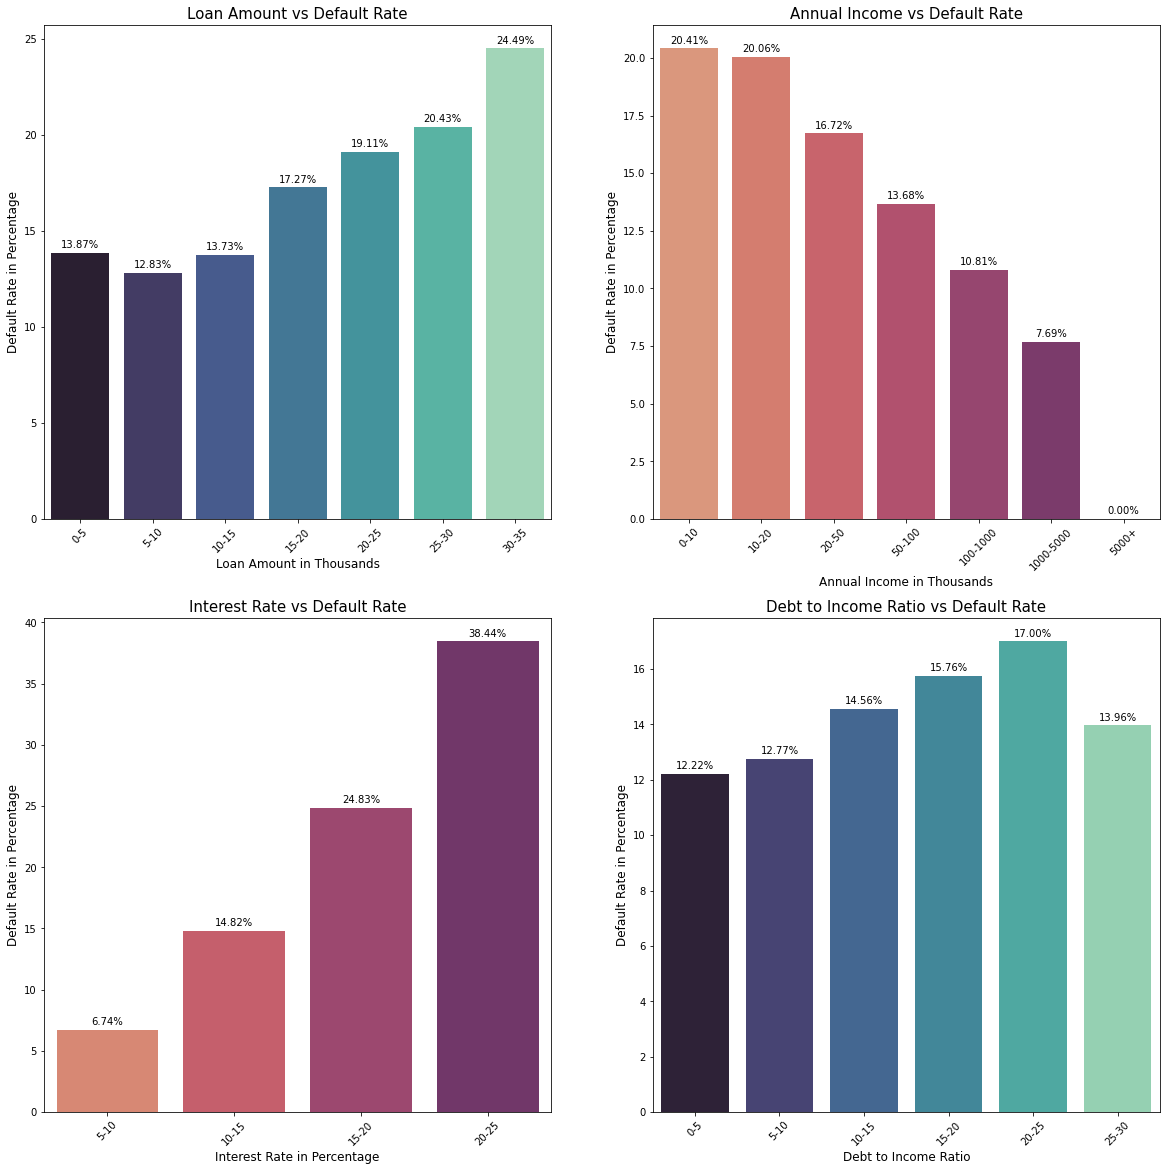

In [70]:
# Plot number of loans defaulted for buckets of loan_amnt, annual_inc, int_rate, dti
fig, axes = plt.subplots(nrows = 2, ncols = 2, gridspec_kw = {'width_ratios': [10, 10], 'height_ratios' : [10, 10]}, figsize = (20, 20))
sns.barplot(x = 'loan_amnt_bucket', y = 'defaulters', data = loan_df, ci = None, ax = axes[0][0], palette = "mako")
axes[0][0].set_xlabel('Loan Amount in Thousands', fontsize = 12)
axes[0][0].set_ylabel('Default Rate in Percentage', fontsize = 12)
axes[0][0].set_title('Loan Amount vs Default Rate', fontsize = 15)
axes[0][0].tick_params(axis='x', labelrotation = 45)
axes[0][0].bar_label(axes[0][0].containers[0], fmt = '%.2f%%', padding = 3)

sns.barplot(x = 'annual_inc_bucket', y = 'defaulters', data = loan_df, ci = None, ax = axes[0][1], palette = "flare")
axes[0][1].set_xlabel('Annual Income in Thousands', fontsize = 12)
axes[0][1].set_ylabel('Default Rate in Percentage', fontsize = 12)
axes[0][1].set_title('Annual Income vs Default Rate', fontsize = 15)
axes[0][1].tick_params(axis='x', labelrotation = 45)
axes[0][1].bar_label(axes[0][1].containers[0], fmt = '%.2f%%', padding = 3)

sns.barplot(x = 'int_rate_bucket', y = 'defaulters', data = loan_df, ci = None, ax = axes[1][0], palette = "flare")
axes[1][0].set_xlabel('Interest Rate in Percentage', fontsize = 12)
axes[1][0].set_ylabel('Default Rate in Percentage', fontsize = 12)
axes[1][0].set_title('Interest Rate vs Default Rate', fontsize = 15)
axes[1][0].tick_params(axis='x', labelrotation = 45)
axes[1][0].bar_label(axes[1][0].containers[0], fmt = '%.2f%%', padding = 3)

sns.barplot(x = 'dti_bucket', y = 'defaulters', data = loan_df, ci = None, ax = axes[1][1], palette = "mako")
axes[1][1].set_xlabel('Debt to Income Ratio', fontsize = 12)
axes[1][1].set_ylabel('Default Rate in Percentage', fontsize = 12)
axes[1][1].set_title('Debt to Income Ratio vs Default Rate', fontsize = 15)
axes[1][1].tick_params(axis='x', labelrotation = 45)
axes[1][1].bar_label(axes[1][1].containers[0], fmt = '%.2f%%', padding = 3)
plt.show()

**Conclusion**

* Majority of the Loans defaulted by Borrowers have applied for high loan amount (30000 - 35000)
* Majority of the Loans defaulted by Borrowers having income in the range 0 to 20000. Also, there is less chance to default as annual income increases.
* Majority of the Loans defaulted by Borrowers have applied with interest rate between 20 to 25. Also, there is more chance to default as interest rate increases.
* Majority of the Loans defaulted by Borrowers have applied with DTI 20 to 25. Can't conclude on why default rate for DTI 25 to 30 is less

### Bivariate Analysis

Analysis of any concurrent relation between two variables or attributes.

First we plot a dendrogram to show hierarchical clustering of correlation between important numerical variables.

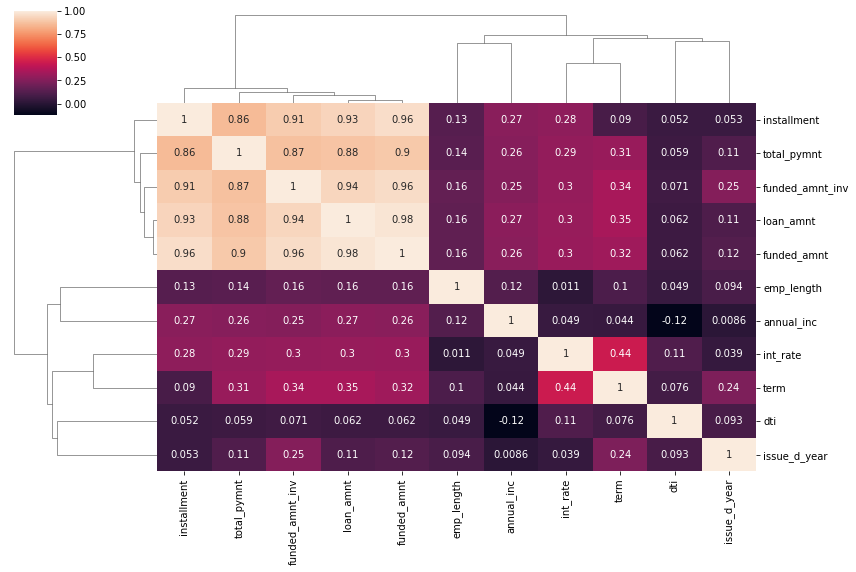

In [71]:
# Create a new dataframe with the important numeric variables
list_of_columns = ['loan_amnt','funded_amnt','funded_amnt_inv', 'emp_length', 'annual_inc', 'dti', 'int_rate', 'term',
                   'installment', 'issue_d_month', 'issue_d_year', 'total_pymnt']
new_loan_df = loan_df.filter(list_of_columns, axis=1)

# Plot cluster map (dendrogram) of correlation of new dataframe
sns.clustermap(new_loan_df.corr(), annot = True, figsize = (12, 8))
plt.show()

**Observation**

* Total Payment received is in general related to amount of loan received.
* Applied Loan amount, Lending Club's Recommended amount, Invested amount are strongly correlated.
* Employment Length and Annual Income are related.
* Annual income and DTI is negatively correalted.

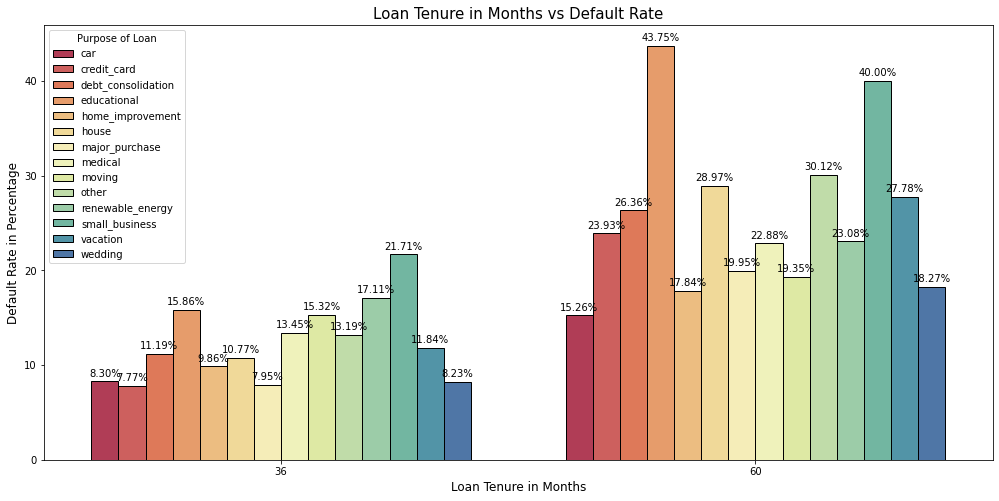

In [72]:
# Plot number of loans defaulted for applicant's purpose of loan and tenure of loan
plt.figure(figsize = (17, 8))
ax = sns.barplot(x = 'term', y = 'defaulters', hue = 'purpose', data = loan_df, ci = None, palette = "Spectral", edgecolor = 'black', linewidth = 1)
plt.xlabel('Loan Tenure in Months', fontsize = 12)
plt.ylabel('Default Rate in Percentage', fontsize = 12)
plt.title('Loan Tenure in Months vs Default Rate', fontsize = 15)
plt.legend(title = 'Purpose of Loan')
for container in ax.containers:
    ax.bar_label(container, fmt = '%.2f%%', padding = 3)
plt.show()

In [207]:
# Break down the above plot to pivot table and see how default rate of each purpose was calculated
# Get unique count for loan status with index grouped in to term and purpose
purpose_df = loan_df.pivot_table(index = ['term', 'purpose'], columns = 'loan_status', aggfunc = lambda x: len(x.unique()), fill_value = 0)['id']
purpose_df['Total'] = purpose_df['Charged Off'] + purpose_df['Fully Paid'] # Sum to find total count
purpose_df['Default Rate in Percentage'] = (purpose_df['Charged Off'] / purpose_df['Total']) * 100 # Find default rate percentage
purpose_df.style

**Conclusion**

* Borrower's default when loan was applied for small busniess and loan tenure month is either 36 and 60
* After 'small business', applicants applied loan for 'debt_consolidation' looks to be next in line for defaulting.
* Eventhough 'education' default percentage looks more, count is very less to conclude anything.

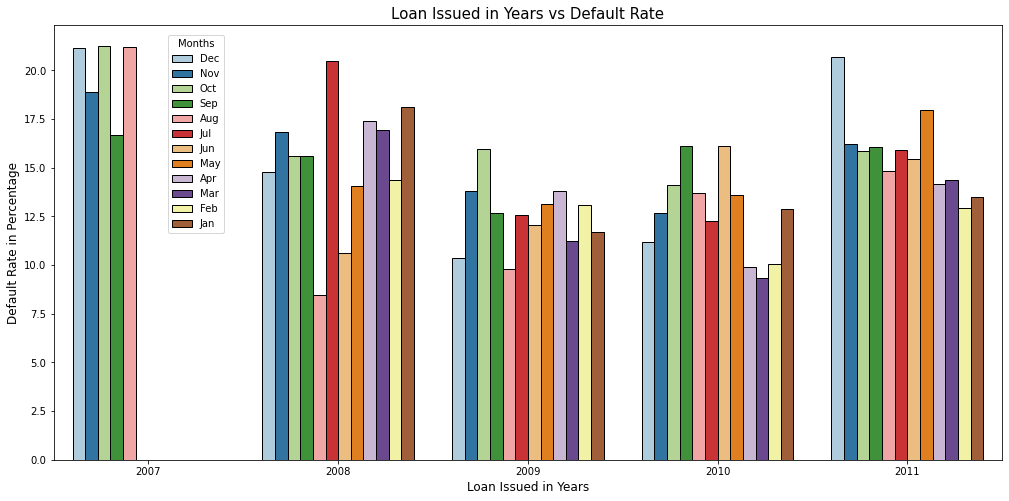

In [101]:
# Plot number of loans defaulted for applicant's purpose of loan and tenure of loan
plt.figure(figsize = (17, 8))
ax = sns.barplot(x = 'issue_d_year', y = 'defaulters', hue = 'issue_d_month', data = loan_df, ci = None, palette = "Paired", edgecolor = 'black', linewidth = 1)
plt.xlabel('Loan Issued in Years', fontsize = 12)
plt.ylabel('Default Rate in Percentage', fontsize = 12)
plt.title('Loan Issued in Years vs Default Rate', fontsize = 15)
plt.legend(title = 'Months', loc = 10, bbox_to_anchor = (0.1, 0.5, 0.1, 0.5))
plt.show()

**Conclusion**

We can infer that default rate is high during loan issued on holidays (Winter - December, Spring-Summer break - May-July).

Since default rate varies within each year, we can't imply that issuing loan at particular month or year is good predictor. Looks like some other factor is influencing the default rate during each month in a year.

Let's quickly check how many loans were issued in years per month.

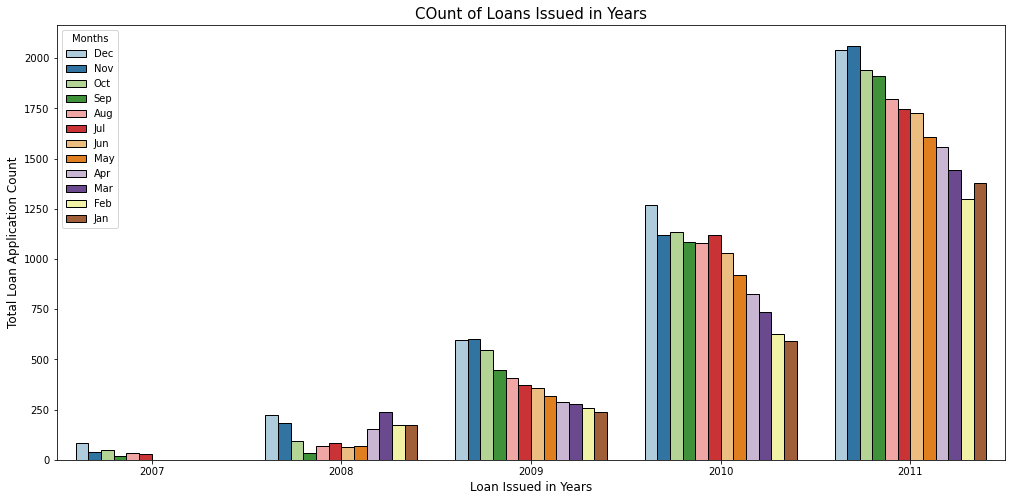

In [106]:
# Plot number of loans issued in years per month
plt.figure(figsize = (17, 8))
ax = sns.countplot(x = 'issue_d_year', hue = 'issue_d_month', data = loan_df, palette = "Paired", edgecolor = 'black', linewidth = 1)
plt.xlabel('Loan Issued in Years', fontsize = 12)
plt.ylabel('Total Loan Application Count', fontsize = 12)
plt.title('COunt of Loans Issued in Years', fontsize = 15)
plt.legend(title = 'Months')
plt.show()

**Conclusion**

Number of loans issed is more in 2011. Also, the count is comparatively high during November-December time frame for each year.

Hence even if loan was issued in holiday time and as per earlier assumption, we can't predict defaulting. Finally it breaks down to annual income, issued year and interest rate.

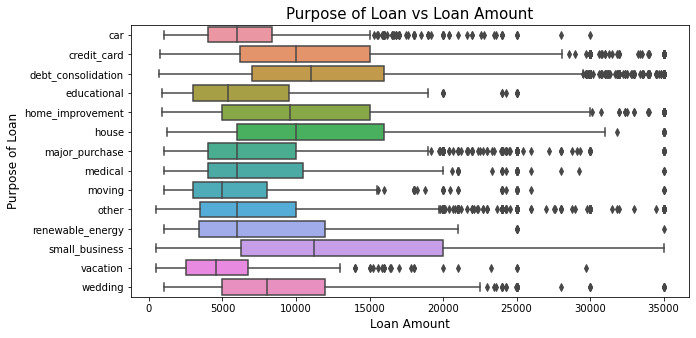

In [74]:
# Plot boxplot for purpose of loan vs amount of loan applied
plt.figure(figsize = (10, 5))
ax = sns.boxplot(y = 'purpose', x = 'loan_amnt', data = loan_df)
ax.set_title('Purpose of Loan vs Loan Amount', fontsize = 15)
ax.set_ylabel('Purpose of Loan', fontsize = 12)
ax.set_xlabel('Loan Amount', fontsize = 12)
plt.show()

**Conclusion**

* 50th and 75th is more for small business loan application
* Loan applied for Debt consolidation and Credit Card payment are next purpose for which loan amount is high.

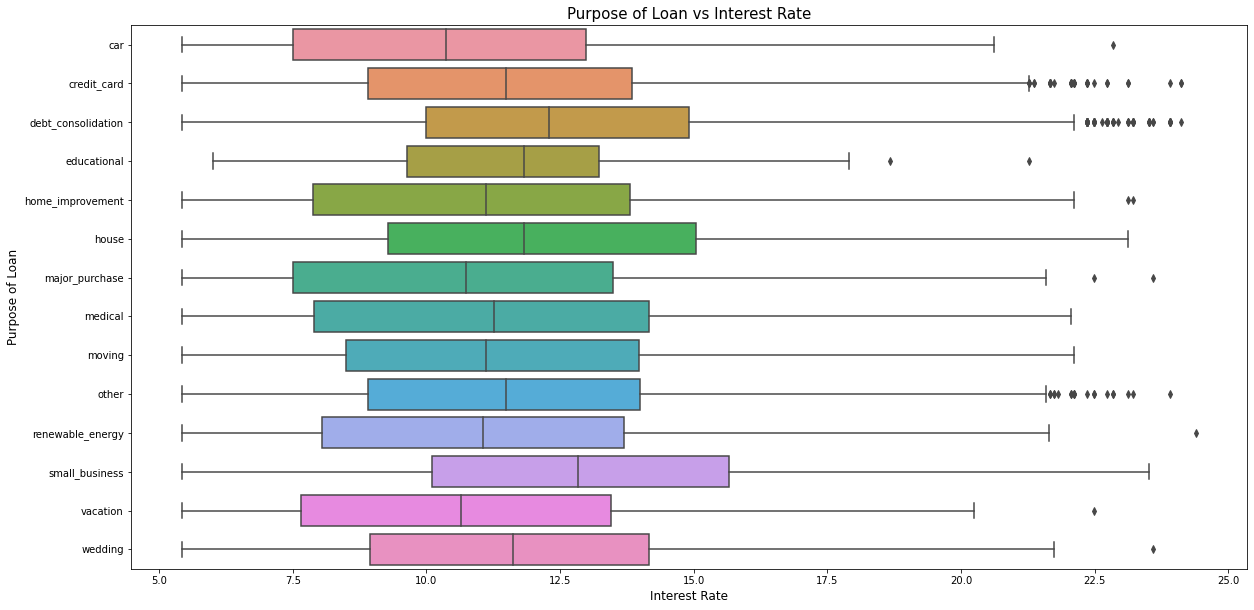

In [75]:
# Plot boxplot of borrower's purpose of loan and interest rate
plt.figure(figsize=(20, 10))
ax = sns.boxplot(y = 'purpose', x = 'int_rate', data = loan_df)
plt.xlabel('Interest Rate', fontsize = 12)
plt.ylabel('Purpose of Loan', fontsize = 12)
plt.title('Purpose of Loan vs Interest Rate', fontsize = 15)
for container in ax.containers:
    ax.bar_label(container, fmt = '%.2f%%', padding = 3)
plt.show()

**Conclusion**

* Intrest rate is very high for loan applied for small business.
* Loan applied for House and Debt consolidation is the next purpose for which interest rate is high.

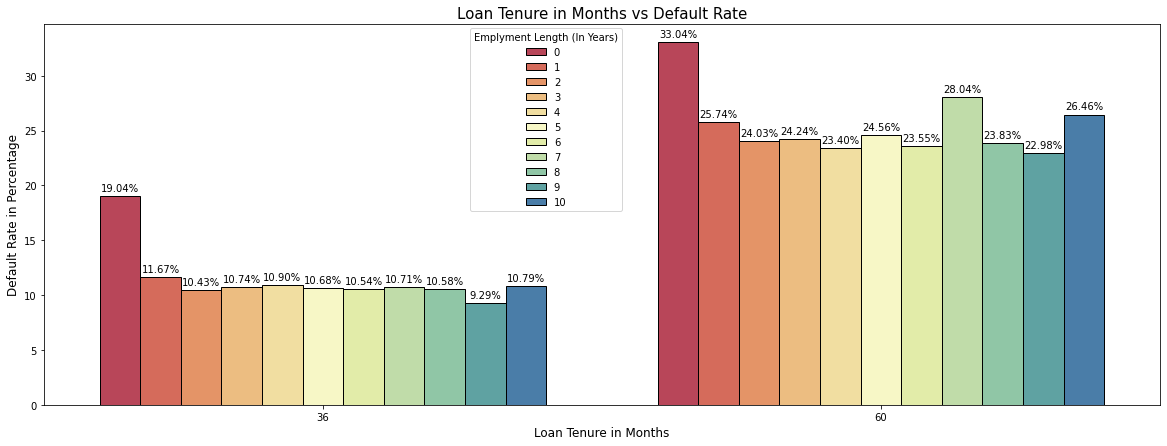

In [86]:
# Plot number of loans defaulted for applicant's employment length and tenure of loan
plt.figure(figsize = (20, 7))
ax = sns.barplot(x = 'term', y = 'defaulters', hue = 'emp_length', data = loan_df, ci = None, palette = "Spectral", edgecolor = 'black', linewidth = 1)
plt.xlabel('Loan Tenure in Months', fontsize = 12)
plt.ylabel('Default Rate in Percentage', fontsize = 12)
plt.title('Loan Tenure in Months vs Default Rate', fontsize = 15)
plt.legend(title = 'Emplyment Length (In Years)', loc = 10, bbox_to_anchor = (0.2, 0.5, 0.5, 0.5))
for container in ax.containers:
    ax.bar_label(container, fmt = '%.2f%%', padding = 3)
plt.show()

**Conclusion**

Borrower's with no job or less than 1 year experience default more than others. For these borrowers it doesn't matter if the loan tenure month is 36 or 60.

Since default rate varies with applicants with greater than 1 year of employment length, annual income is much more good predictor than employment length.

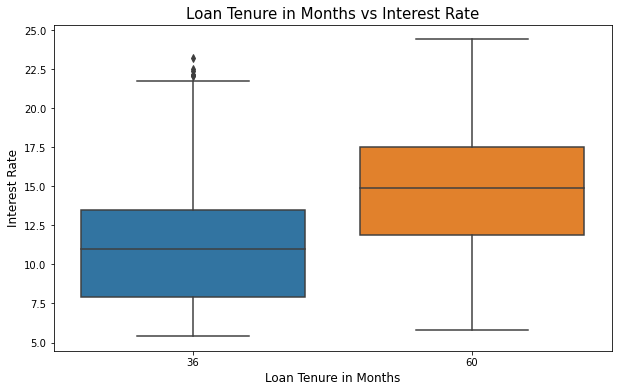

In [77]:
# Plot boxplot for interest rate and tenure of loan
plt.figure(figsize = (10, 6))
ax = sns.boxplot(y = 'int_rate', x = 'term', data = loan_df)
ax.set_title('Loan Tenure in Months vs Interest Rate', fontsize = 15)
ax.set_ylabel('Interest Rate', fontsize = 12)
ax.set_xlabel('Loan Tenure in Months', fontsize = 12)
plt.show()

**Conclusion**

* Majority of the loans issued for higher interest rate have a total tenure of 60 months.
* 50th percentile (Median - middle black line in box plot) shows how much interest rate is different between two loan tenures - 36 and 60.

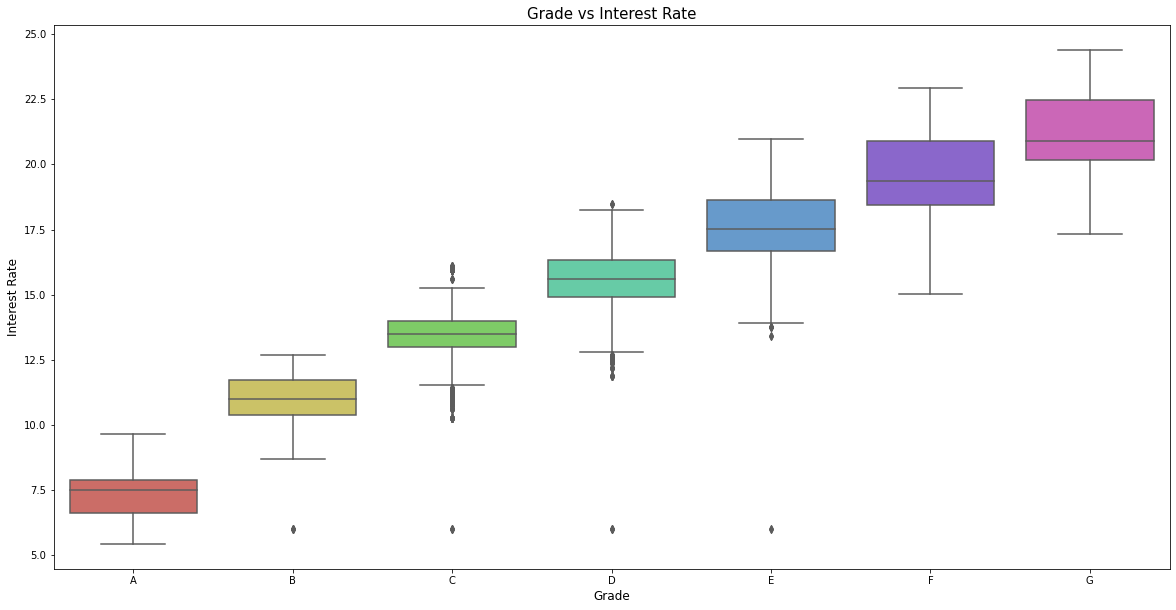

In [78]:
# Plot boxplot for interest rate and grade
plt.figure(figsize = (20, 10))
ax = sns.boxplot(x = 'grade', y = 'int_rate', data = loan_df, palette = "hls")
plt.xlabel('Grade', fontsize = 12)
plt.ylabel('Interest Rate', fontsize = 12)
plt.title('Grade vs Interest Rate', fontsize = 15)
for container in ax.containers:
    ax.bar_label(container, fmt = '%.2f%%', padding = 3)
plt.show()

**Conclusion**

Interest Rate increases with grades - A to G.

This clearly explains why total count of loans in Grade A and B is high. Applicants wants to repay loan amount back with less interest rate.

Also, this explains why there are more defaulters in grade G. Applicants who have to repay with large interest rate is likely to default.

Interest Rate is calculated by Credit Bureaus (In India, CIBIL is the most popular company that tracks credit information) and based on that loan applicants are categorized in to different grades and sub grades.

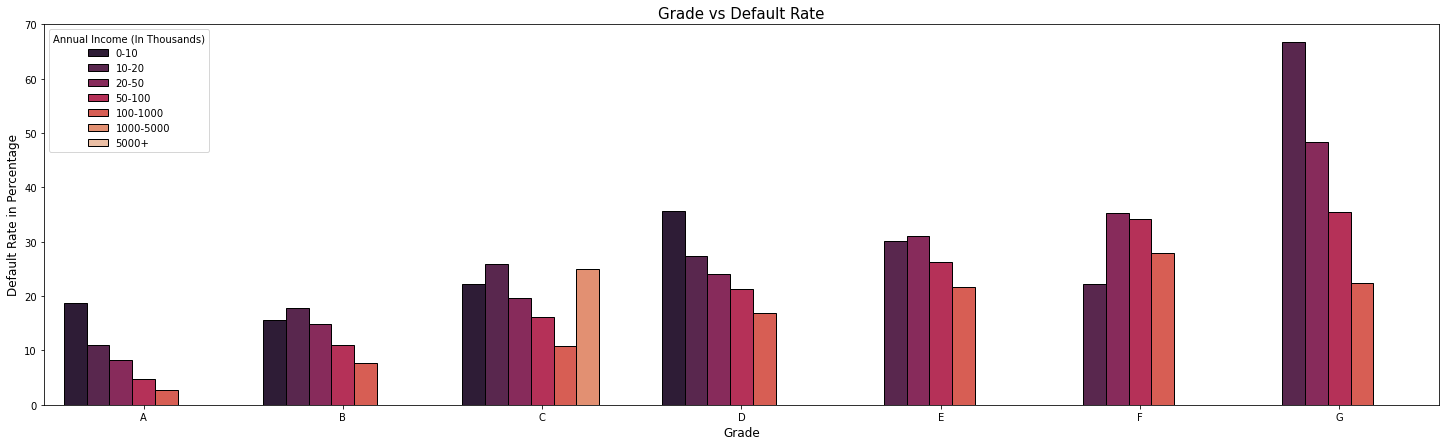

In [208]:
# Plot percentage of loans defaulted for applicant's annual income and grade
plt.figure(figsize = (25, 7))
ax = sns.barplot(x = 'grade', y = 'defaulters', hue = 'annual_inc_bucket', data = loan_df, ci = None, palette = "rocket", edgecolor = 'black', linewidth = 1)
plt.xlabel('Grade', fontsize = 12)
plt.ylabel('Default Rate in Percentage', fontsize = 12)
plt.title('Grade vs Default Rate', fontsize = 15)
plt.legend(title = 'Annual Income (In Thousands)')
plt.show()

**Conclusion**

* For grades B, C and G, borrowers with annual income in the range 10000 to 20000 are defaulted more.
* For grades E and F, borrowers with annual income in the range 20000 to 50000 are defaulted more.
* For grades A and B, borrowers with annual income in the range 0 to 10000 are defaulted more.

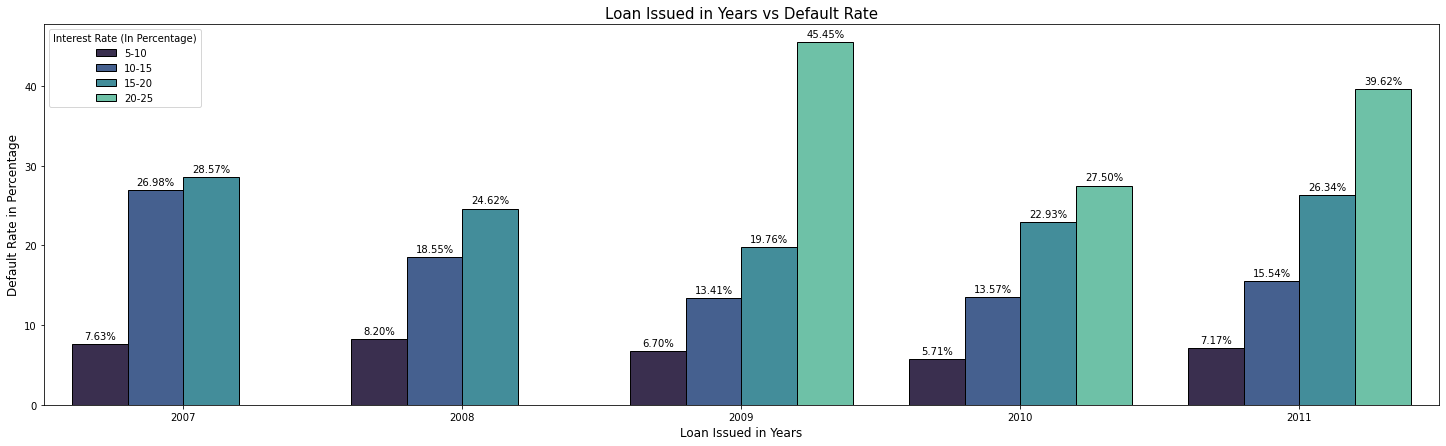

In [209]:
# Plot percentage of loans defaulted for interest rate and year in which loan was issued
plt.figure(figsize = (25, 7))
ax = sns.barplot(x = 'issue_d_year', y = 'defaulters', hue = 'int_rate_bucket', data = loan_df, ci = None, palette = "mako", edgecolor = 'black', linewidth = 1)
plt.xlabel('Loan Issued in Years', fontsize = 12)
plt.ylabel('Default Rate in Percentage', fontsize = 12)
plt.title('Loan Issued in Years vs Default Rate', fontsize = 15)
plt.legend(title = 'Interest Rate (In Percentage)')
for container in ax.containers:
    ax.bar_label(container, fmt = '%.2f%%', padding = 3)
plt.show()

**Conclusion**

Majority of borrowers defaulted when interest rate was high (20 to 25) in years 2009, 2010 and 2011

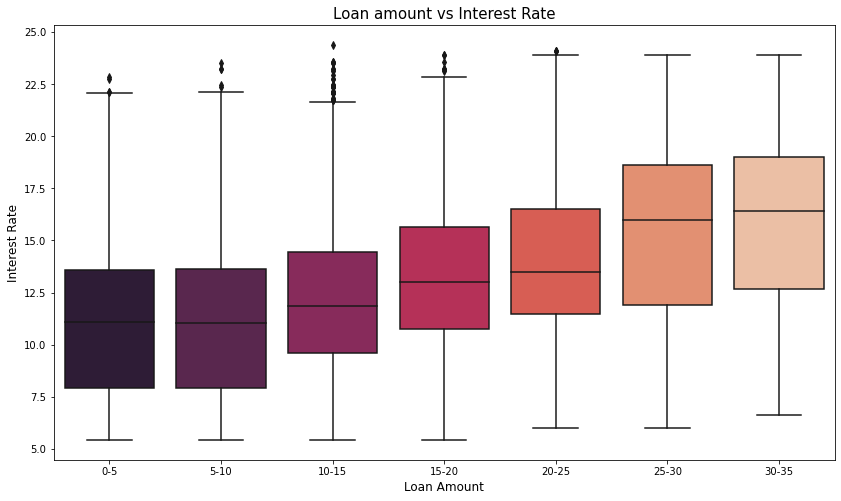

In [84]:
# Plot boxplot for interest rate and loan amount issued
plt.figure(figsize = (14, 8))
ax = sns.boxplot(y = 'int_rate', x = 'loan_amnt_bucket', data = loan_df, palette = "rocket")
ax.set_title('Loan amount vs Interest Rate', fontsize = 15)
ax.set_ylabel('Interest Rate', fontsize = 12)
ax.set_xlabel('Loan Amount', fontsize = 12)
plt.show()

**Conclusion**

Intrest rate increases when loan amount increases.

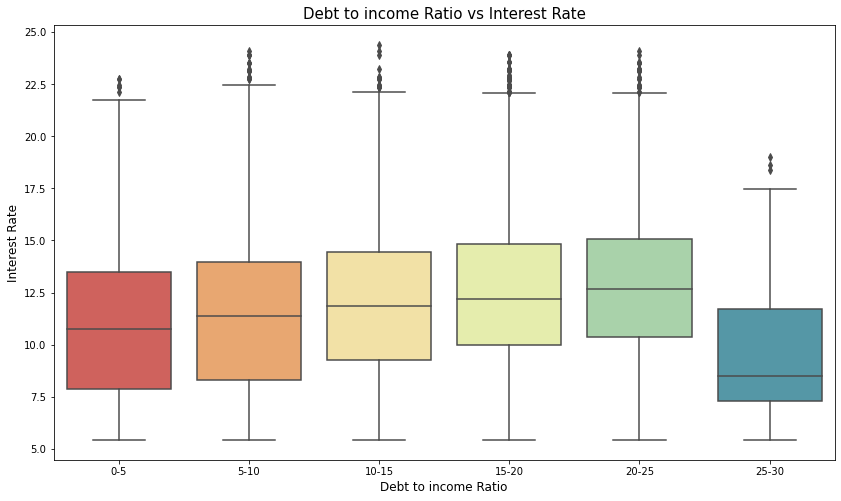

In [82]:
# Plot boxplot for interest rate and debt to income ratio
plt.figure(figsize = (14, 8))
ax = sns.boxplot(y = 'int_rate', x = 'dti_bucket', data = loan_df, palette = "Spectral")
ax.set_title('Debt to income Ratio vs Interest Rate', fontsize = 15)
ax.set_ylabel('Interest Rate', fontsize = 12)
ax.set_xlabel('Debt to income Ratio', fontsize = 12)
plt.show()

**Conclusion**

Intrest rate increases slightly with DTI.

This clearly explains why there are less defaulters in DTI bucket 25-30, as interest rate is very less.

So DTI can't be good predictor, since percentage of defaulters changes as per interest rate varies.

**Analysis of Possible Driving Factors**

Let's plot a pair plot to further understand the possible driving factors - annual income, loan amount, interest rate, year at which loan was issued with respect to loan status

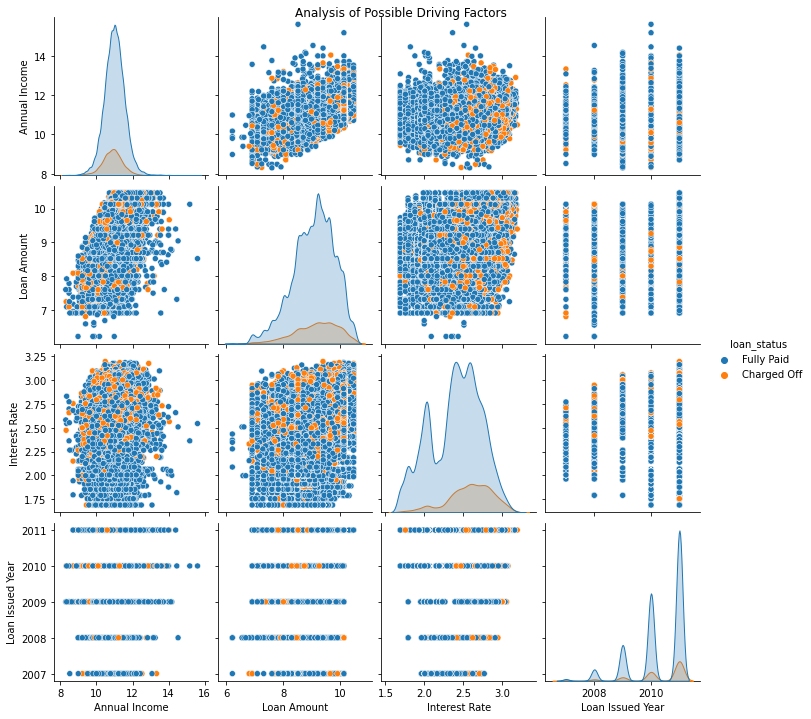

In [221]:
# Pair plot of possible driving factors
list_of_columns = ['annual_inc', 'loan_amnt', 'int_rate', 'issue_d_year', 'loan_status']
new_loan_df = loan_df.filter(list_of_columns, axis=1)
# Better to plot in log-log scale for 'annual_inc', 'loan_amnt', 'int_rate' columns as they tend to vary more
new_loan_df['annual_inc'] = np.log(new_loan_df['annual_inc'])
new_loan_df['loan_amnt'] = np.log(new_loan_df['loan_amnt'])
new_loan_df['int_rate'] = np.log(new_loan_df['int_rate'])
# Pair Plot
g = sns.pairplot(new_loan_df, hue = 'loan_status')
# Labels
labels = ['Annual Income', 'Loan Amount', 'Interest Rate', 'Loan Issued Year']
for i in range(4):
    for j in range(4):
        g.axes[j,i].xaxis.set_label_text(labels[i])
        g.axes[j,i].yaxis.set_label_text(labels[j])
plt.suptitle('Analysis of Possible Driving Factors', va = 'bottom')
plt.show()

#### **Conclusion**

* Loan amount applied is higher with high annual income.
* Loan amount applied increases with high interest rate.
* More loans are charged off with increasing year. But it can't be always true for future loan approvals.
* More loans were charged off when interest rate was high.

#### Prediction Percentage of Driving Factors

Let's find the defaulter prediction percentage of various driving factors and identify the top predictor variable.<br>
* To get this value, first divide driving factors to various buckets (binning).
* Then take count of 'Charged Off' and 'Fully Paid' of each buckets.<br>
* Then get average of default cases, default rate = Count('Charged Off') / Count('Charged Off' + 'Fully Paid')
* Take difference of max and min value in each bucket and multiply by 100 to get percentage:<br>
  Defaulter Prediction Percentage = (max - min) * 100

We have four major driving factors<br>
* Based on Demography of Applicant - annual income and bankruptcy record
* Based on Loan Characteristics - loan amount and interest rate

In [186]:
def def_rate_calc(col):
    temp_df = loan_df.pivot_table(index = col, columns = 'loan_status', aggfunc = lambda x: len(x.unique()), fill_value = 0)['id']
    temp_df['Total'] = temp_df['Charged Off'] + temp_df['Fully Paid'] # Sum to find total count
    temp_df['Default Rate'] = temp_df['Charged Off'] / temp_df['Total'] # Find default rate percentage
    temp_df.sort_values('Default Rate', ascending = False, inplace = True)
    drp = (np.max(temp_df['Default Rate']) - np.min(temp_df['Default Rate'])) * 100
    return drp

# Prediction percentage of variable Annual Income
print('Defaulter prediction with Annual Income : {:.2f} %'.format(def_rate_calc('annual_inc_bucket')))
print('Defaulter prediction with Loan Amount : {:.2f} %'.format(def_rate_calc('loan_amnt_bucket')))
print('Defaulter prediction with Interest Rate : {:.2f} %'.format(def_rate_calc('int_rate_bucket')))
print('Defaulter prediction with Bankruptcy Record : {:.2f} %'.format(def_rate_calc('pub_rec_bankruptcies')))

Defaulter prediction with Annual Income : 20.41 %
Defaulter prediction with Loan Amount : 11.66 %
Defaulter prediction with Interest Rate : 31.70 %
Defaulter prediction with Bankruptcy Record : 25.81 %


### Top Predictors in Descending Order
* Interest Rate
* Bankruptcy Record
* Annual Income
* Loan Amount


## Recommendation

### Based on Demography of Applicant

* Applicants who previously defaulted will default again.

* If Annual Income is more, there is very less chance to default.

* Extra scrutiny is required for Applicants belonging States NV and CA, since they have high tendency to default.

* Extra scrutiny is required if Applicants have employment length less than 1 year or no job history.


### Based on Loan Characteristics

* Loans with high interest rate have high tendency to default.

* High tendency to default, if the loan amount is high and tenure is 60 months.

* Extra scrutiny is required if the purpose of loan applied is for small business.